In [3]:
#load libraries
import sweetviz as sv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost import XGBClassifier, callback
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


In [149]:
# Read the Parquet file into a Pandas DataFrame
df = pd.read_parquet("feature.parq")

# Now you can work with your data in the DataFrame
df

,mid_prc,b66accf4d4,01d830fc33,ac29aa28b0,86eecbe036,9c51f3cf1d,706dbe6d28,cb232e1c9f,301f8d1b44,134e1a6937,...,2d1cf32644,18af9014b6,9b980c18d7,d762c12f50,c7c3c1666c,73762306aa,1c6e322c2d,0d19cb3fb0,486cb65b0c,c49a5f9c65
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-04-16 00:00:05,1588.010010,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
2025-04-16 00:00:06,1587.824951,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.601331,...,0.023879,-1.795081,5.000000,5.000000,-0.614067,-5.000000,5.000000,5.000000,-0.774996,-5.000000
2025-04-16 00:00:07,1587.824951,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.322740,...,0.766593,5.000000,5.000000,5.000000,0.142544,3.931395,5.000000,5.000000,-0.024244,-3.626100
2025-04-16 00:00:08,1587.305054,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-4.450434,-5.000000,-5.000000,-5.000000,-4.419014,-5.000000,-5.000000,-5.000000
2025-04-16 00:00:09,1587.285034,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-4.941638,-5.000000,-5.000000,-5.000000,-4.966719,-5.000000,-5.000000,-5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-22 23:59:55,1755.185059,1.592446,1.272337,1.085889,1.085897,1.808142,1.540320,0.781662,0.772978,1.297135,...,0.927776,1.130970,1.416701,1.138098,0.603758,1.148668,1.395461,1.142015,0.385636,1.169348
2025-04-22 23:59:56,1755.185059,-0.445452,-0.207513,-0.236142,-0.236145,-0.388044,-0.064191,-0.665100,-0.659043,0.618027,...,0.832506,1.130444,1.250041,1.137565,0.564455,1.148124,1.247377,1.141478,0.357416,1.168783
2025-04-22 23:59:57,1755.574951,1.179695,0.758192,0.622311,0.622315,2.198675,1.170764,0.899781,0.889898,1.536343,...,1.076383,1.129958,1.010859,1.137072,0.800971,1.147622,1.001346,1.140982,0.605599,1.168262


In [6]:
# change old columns names
old_cols = df.columns.tolist()

print(old_cols)

['mid_prc', 'b66accf4d4', '01d830fc33', 'ac29aa28b0', '86eecbe036', '9c51f3cf1d', '706dbe6d28', 'cb232e1c9f', '301f8d1b44', '134e1a6937', '5f3f783a1f', 'd182b35ca9', 'c910253362', '8572904679', '486b27acac', 'e10ab80234', '5e7e5a691e', 'ec021e3c39', 'c12d090869', 'ac567aa14a', '5e95d4c57f', '84e6dad0a3', '72e0d3737a', '865224234b', '497584e7d1', 'fe12c6cc6c', '7d08e345ba', 'e486088bae', 'e093f74611', '7a0f3d15e0', '7373db20a8', 'd50ec44f62', '98727525fc', '4a9f632715', 'f46c65222f', 'ac8a9f9f8f', 'd4112c20e5', 'd5b6b02144', 'da2cdd99f0', 'f2541b5abc', 'f98542952a', 'ffbe745f16', '3e21085969', 'a4e012f275', '5b49e63bed', 'be3e28c4c3', 'd204751de5', 'fa27718d2f', '066b586798', '299afc361e', 'f9729a88bb', '470d88c5b1', 'd2edb86598', '71cf837e9a', '203633358c', 'd0cfd8e5d0', 'e2ab68e2c7', '81bb633696', '2ebb6e47c7', '1b6ac90abc', 'dee93af023', '7e149245ee', 'df3261ae5e', 'a94fc5357b', '21a69fbc66', 'c5001fe3b3', '1aa3d78298', 'c2675078fe', 'e2624a64cd', '5d422876c4', 'fd5d8e0768', '1a7b351

In [151]:
# Create mapping dictionary
old_cols = df.columns.tolist()
new_cols = list(range(len(old_cols)))

mapping = dict(zip(old_cols, new_cols))      # old -> new
reverse_mapping = {v: k for k, v in mapping.items()}  # new -> old (optional)

# Rename columns
df.columns = new_cols

print("Renamed DataFrame:")
print(df)
print("\nMapping old→new:", mapping)
print("Mapping new→old:", reverse_mapping)

Renamed DataFrame:
                              0         1         2         3         4   \
timestamp                                                                  
2025-04-16 00:00:05  1588.010010  5.000000  5.000000  5.000000  5.000000   
2025-04-16 00:00:06  1587.824951 -5.000000 -5.000000 -5.000000 -5.000000   
2025-04-16 00:00:07  1587.824951 -5.000000 -5.000000 -5.000000 -5.000000   
2025-04-16 00:00:08  1587.305054 -5.000000 -5.000000 -5.000000 -5.000000   
2025-04-16 00:00:09  1587.285034 -5.000000 -5.000000 -5.000000 -5.000000   
...                          ...       ...       ...       ...       ...   
2025-04-22 23:59:55  1755.185059  1.592446  1.272337  1.085889  1.085897   
2025-04-22 23:59:56  1755.185059 -0.445452 -0.207513 -0.236142 -0.236145   
2025-04-22 23:59:57  1755.574951  1.179695  0.758192  0.622311  0.622315   
2025-04-22 23:59:58  1755.574951  0.048991 -0.031610 -0.107992 -0.107994   
2025-04-22 23:59:59  1755.574951 -0.429510 -0.413162 -0.460147 -0.460

In [11]:
#run a preliminary EDA using Sweetviz library
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [12]:
#getting the html file
report.show_html("sweetviz_report.html")

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# Let's get a quick stat summary of each feature
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
count,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,...,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000,604378.000000
mean,1604.851074,-0.001574,0.000471,0.000961,0.000961,-0.003787,-0.004580,-0.002970,-0.003124,0.000960,...,0.000102,-0.001177,-0.001475,-0.001235,-0.000627,-0.001408,-0.001800,-0.001257,-0.000812,-0.001446
std,33.198315,1.002511,1.000538,0.999159,0.999160,1.005867,1.007191,1.004049,1.002259,1.061541,...,0.997537,1.001698,0.967030,1.001712,1.002166,1.001653,0.966073,1.001713,1.002266,1.001555
min,1536.010010,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,1581.724976,-0.673479,-0.634930,-0.610623,-0.610618,-0.661305,-0.605361,-0.596674,-0.595345,-0.295918,...,-0.523161,-1.018428,-0.643154,-1.028844,-0.588139,-1.011383,-0.636527,-1.028464,-0.621631,-1.004722
50%,1591.655029,-0.007083,-0.004322,0.000993,0.001000,-0.003068,-0.006797,0.000932,0.000944,-0.000310,...,0.009299,0.770835,0.010962,0.779418,0.011513,0.718494,0.008375,0.769727,0.011204,0.690965
75%,1612.604980,0.664406,0.633471,0.612619,0.612619,0.654505,0.595105,0.594139,0.592611,0.303442,...,0.532350,0.960790,0.643316,0.957942,0.592339,0.947430,0.634845,0.954898,0.628167,0.936125
max,1777.680054,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [153]:
#check whether the mid_prc change is equal to any of the features we already have 
df["Change in mid_prc"]=df[0].pct_change()
df.info()
#it appears there's none 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604378 entries, 2025-04-16 00:00:05 to 2025-04-22 23:59:59
Data columns (total 88 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   0                  604378 non-null  float32
 1   1                  604378 non-null  float32
 2   2                  604378 non-null  float32
 3   3                  604378 non-null  float32
 4   4                  604378 non-null  float32
 5   5                  604378 non-null  float32
 6   6                  604378 non-null  float32
 7   7                  604378 non-null  float32
 8   8                  604378 non-null  float32
 9   9                  604378 non-null  float32
 10  10                 604378 non-null  float32
 11  11                 604378 non-null  float32
 12  12                 604378 non-null  float32
 13  13                 604378 non-null  float32
 14  14                 604378 non-null  float32
 15  15               

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604378 entries, 2025-04-16 00:00:05 to 2025-04-22 23:59:59
Data columns (total 89 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   0                         604378 non-null  float32
 1   1                         604378 non-null  float32
 2   2                         604378 non-null  float32
 3   3                         604378 non-null  float32
 4   4                         604378 non-null  float32
 5   5                         604378 non-null  float32
 6   6                         604378 non-null  float32
 7   7                         604378 non-null  float32
 8   8                         604378 non-null  float32
 9   9                         604378 non-null  float32
 10  10                        604378 non-null  float32
 11  11                        604378 non-null  float32
 12  12                        604378 non-null  float32
 13  13        

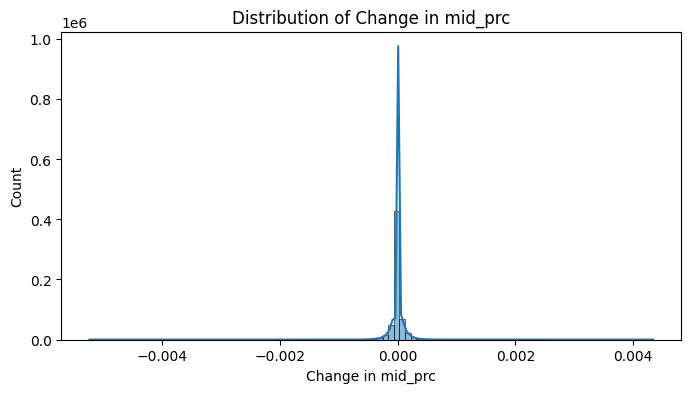

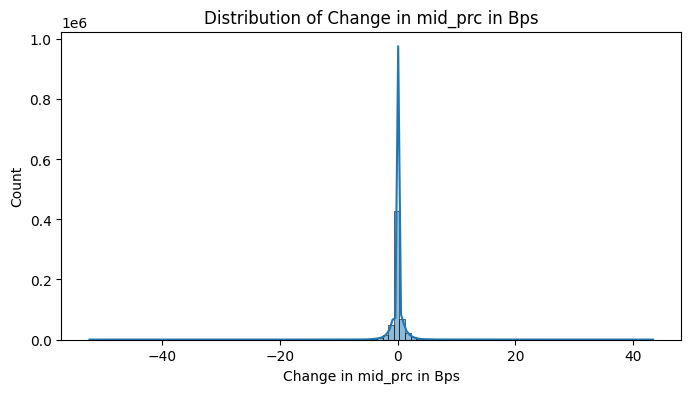

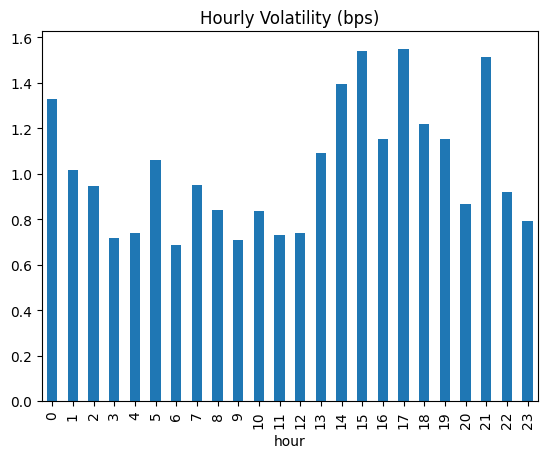

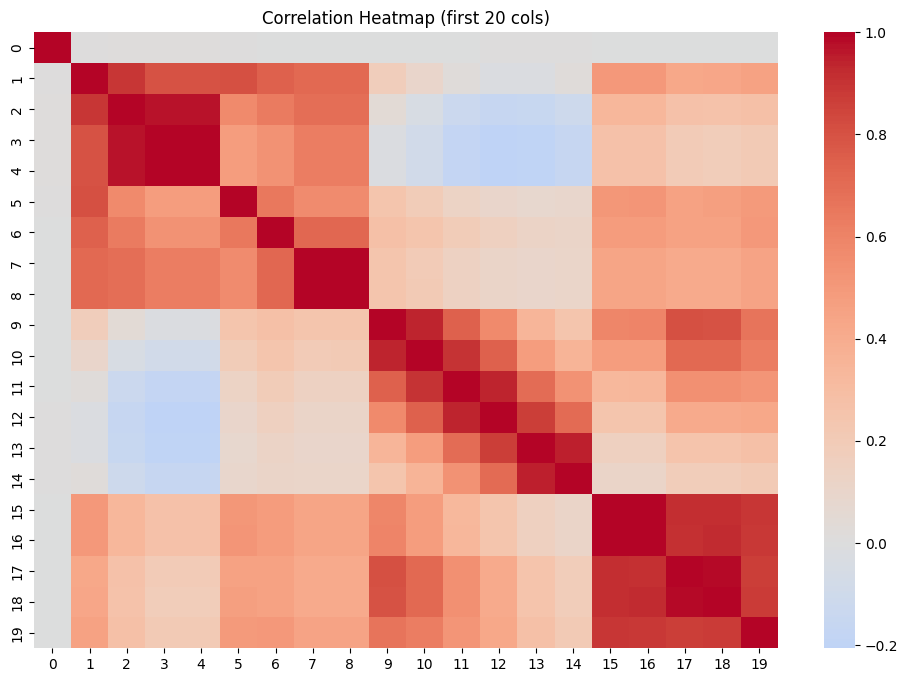

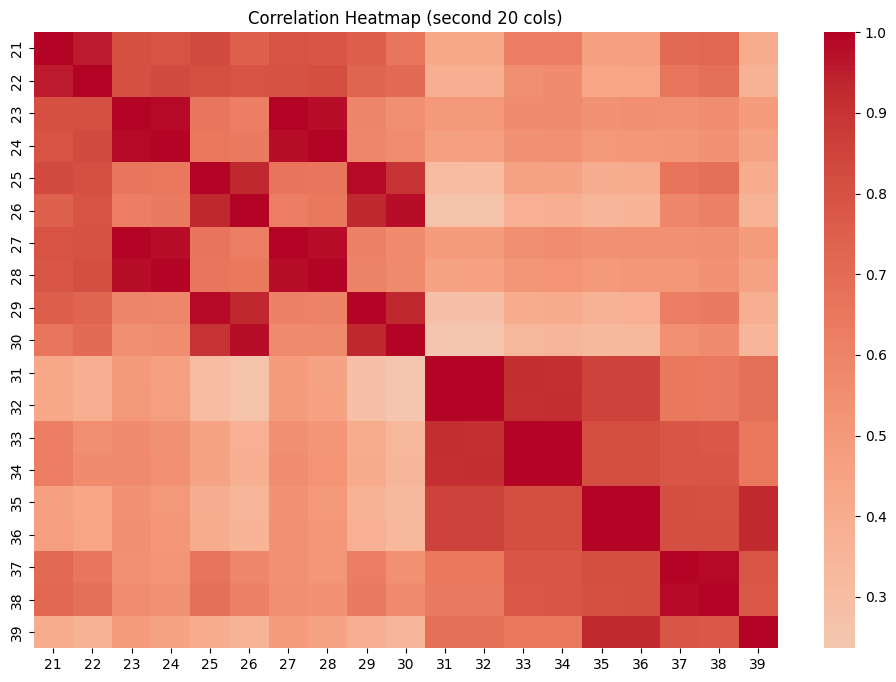

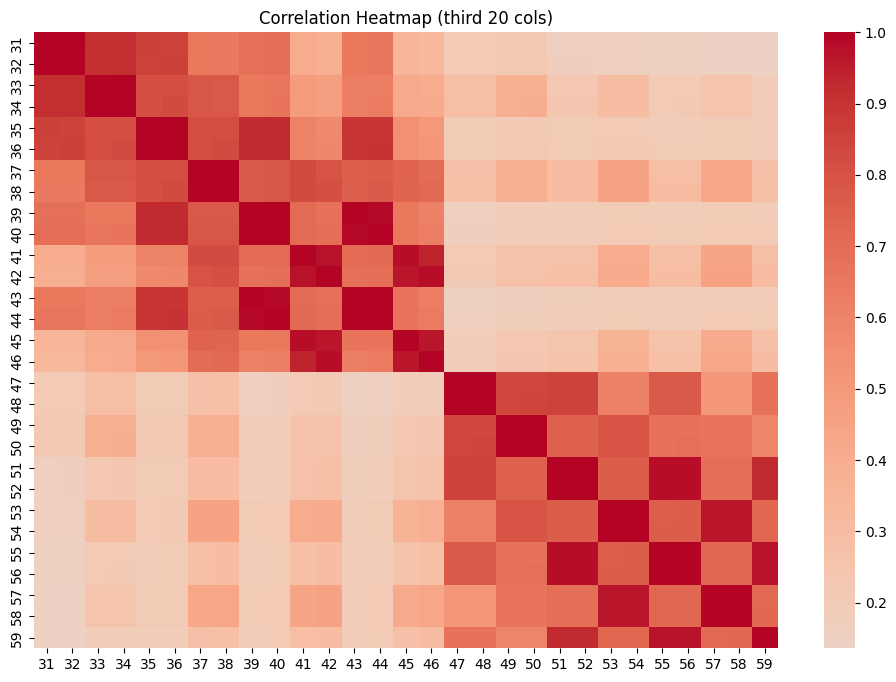

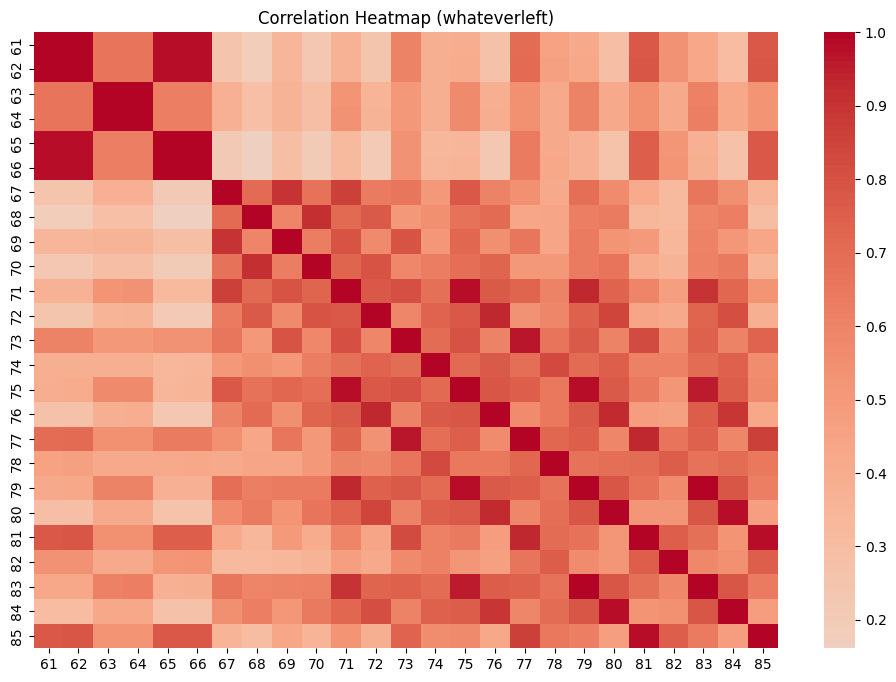

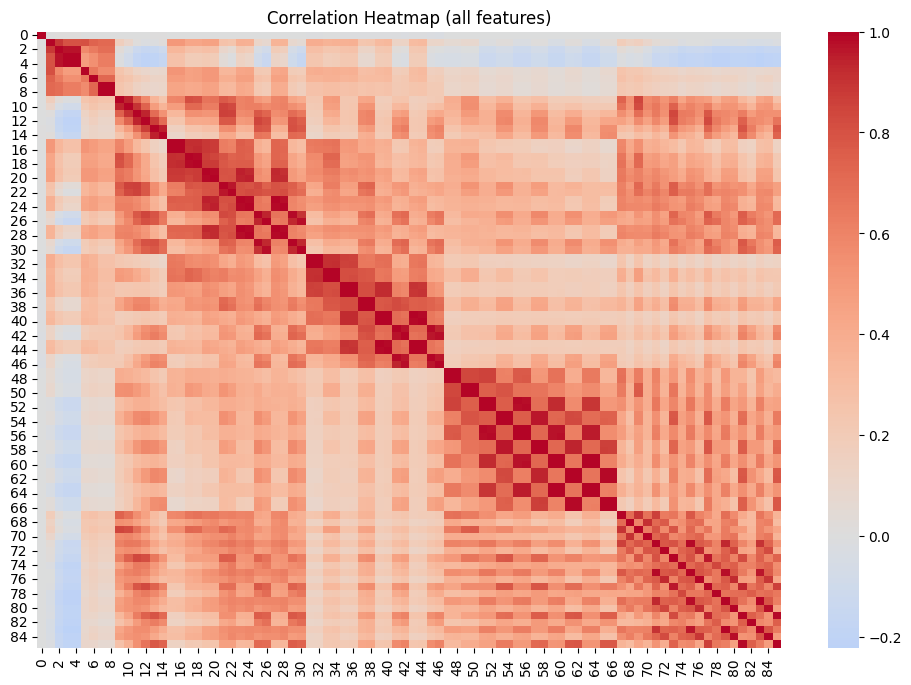

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with DatetimeIndex
print(df.info())
print(df.describe().T.head(15))  # first 15 columns only

# --- 1. Missing values ---
print(df.isnull().sum().sort_values(ascending=False).head(10))

# --- 2. Time coverage ---
print("Start:", df.index.min(), " End:", df.index.max())
print("Frequency guess:", pd.infer_freq(df.index))

# Check for gaps
time_diff = df.index.to_series().diff().value_counts().head(10)
print("Most common time steps:\n", time_diff)

# --- 3. Distribution of last two columns ---
for col in ["Change in mid_prc", "Change in mid_prc in Bps"]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=100, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# --- 4. Intraday seasonality ---
df['hour'] = df.index.hour
hourly_vol = df.groupby('hour')["Change in mid_prc in Bps"].std()
hourly_vol.plot(kind="bar", title="Hourly Volatility (bps)")
plt.show()

# --- 5. Correlations (subset) ---
subset = df.iloc[:, :20]  # first 20 features only
plt.figure(figsize=(12,8))
sns.heatmap(subset.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (first 20 cols)")
plt.show()

subset = df.iloc[:,21:40]  # next 20 features 
plt.figure(figsize=(12,8))
sns.heatmap(subset.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (second 20 cols)")
plt.show()

subset = df.iloc[:,31:60]  # next 20 features 
plt.figure(figsize=(12,8))
sns.heatmap(subset.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (third 20 cols)")
plt.show()

subset = df.iloc[:,61:86]  # features left 
plt.figure(figsize=(12,8))
sns.heatmap(subset.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (whateverleft)")
plt.show()

subset = df.iloc[:,:86]  # all left 
plt.figure(figsize=(12,8))
sns.heatmap(subset.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (all features)")
plt.show()


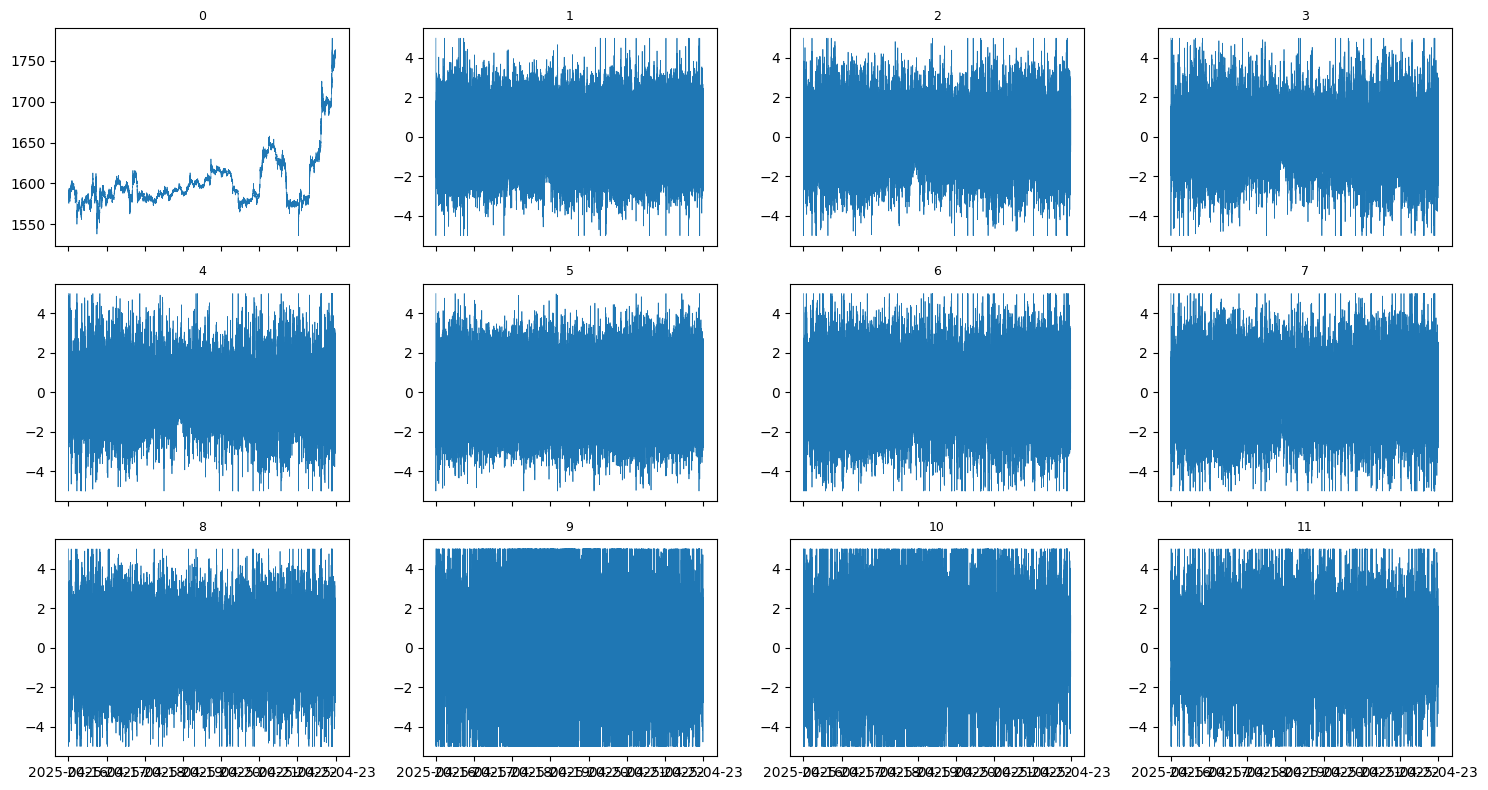

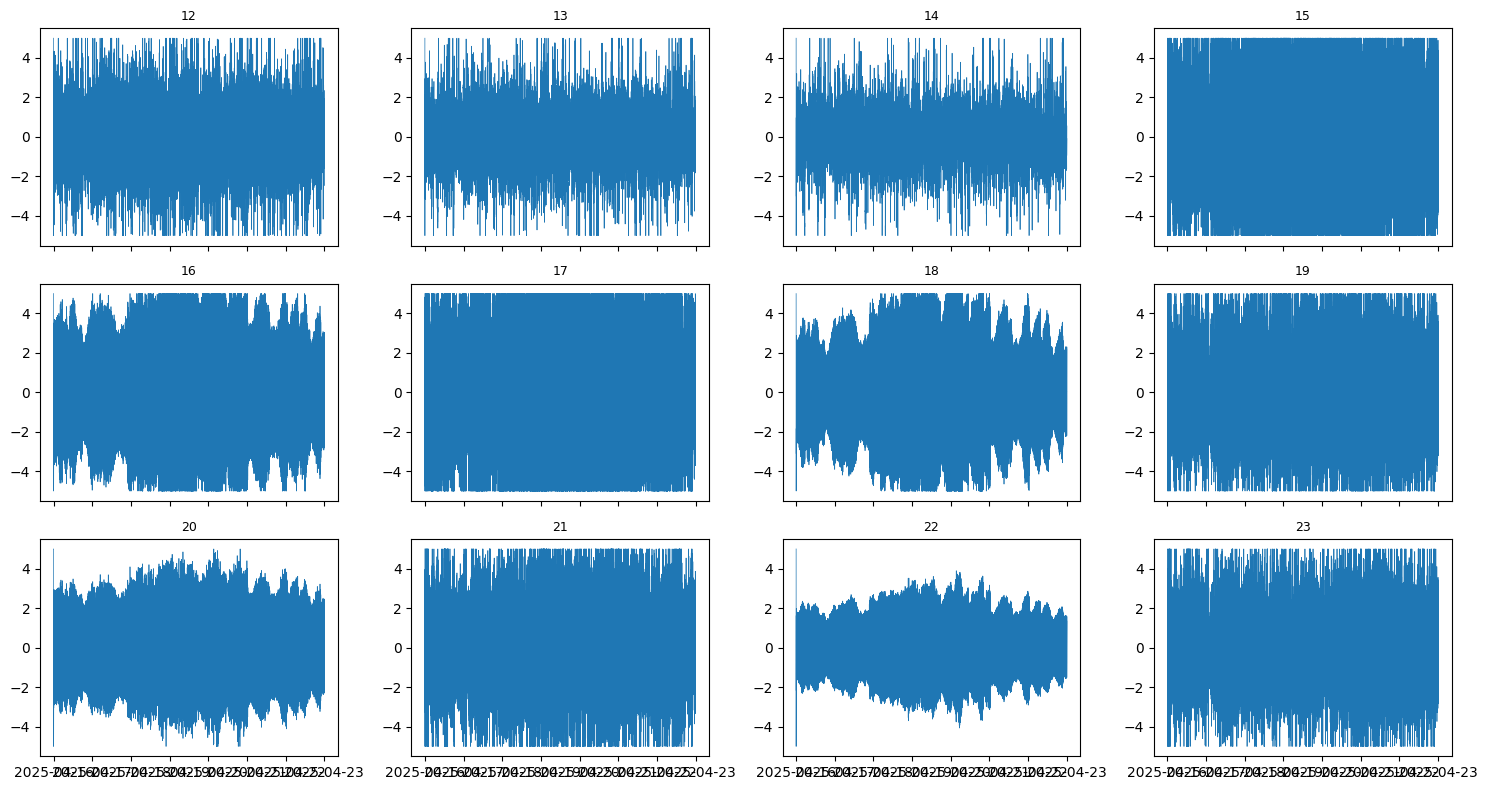

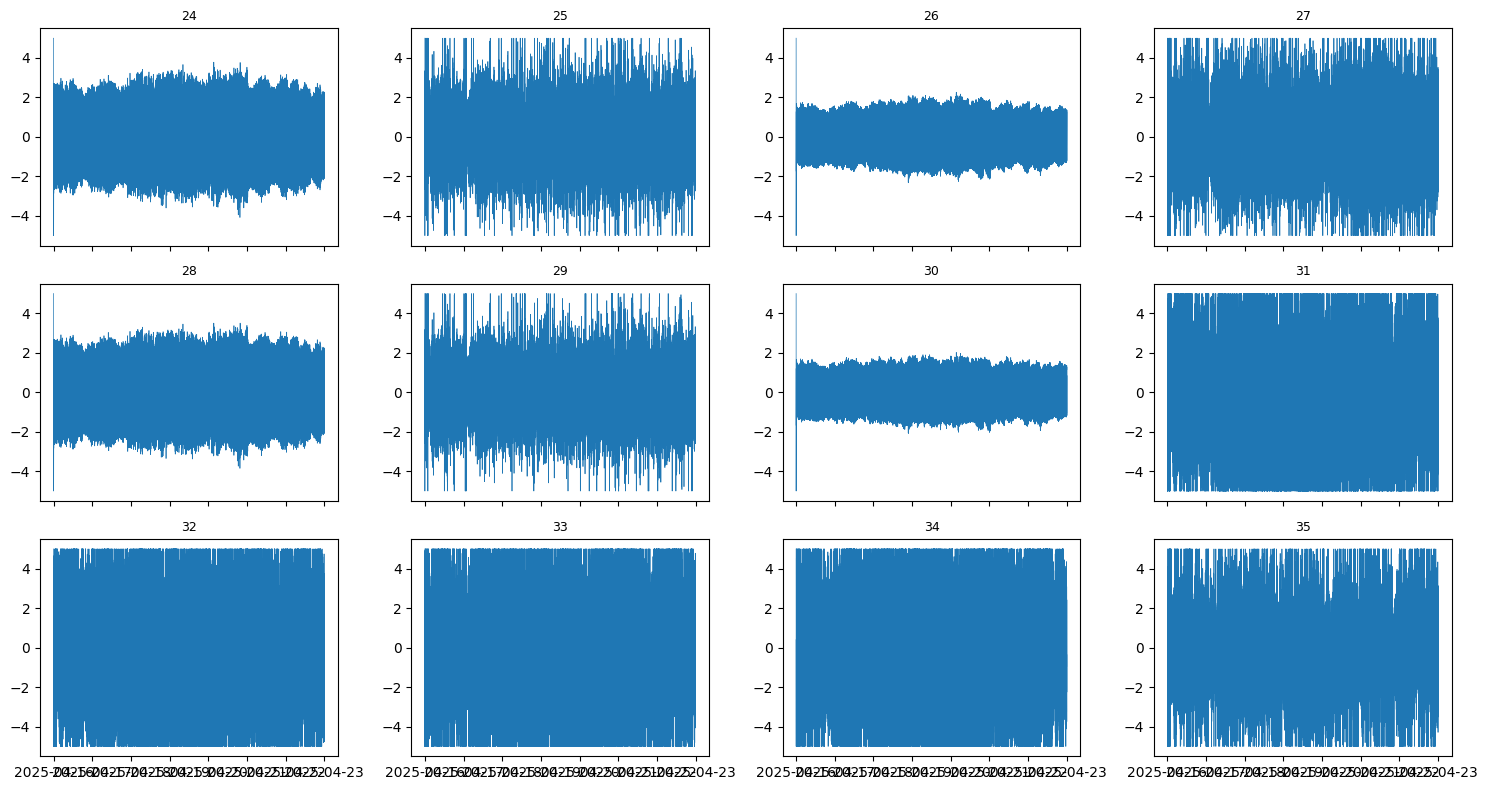

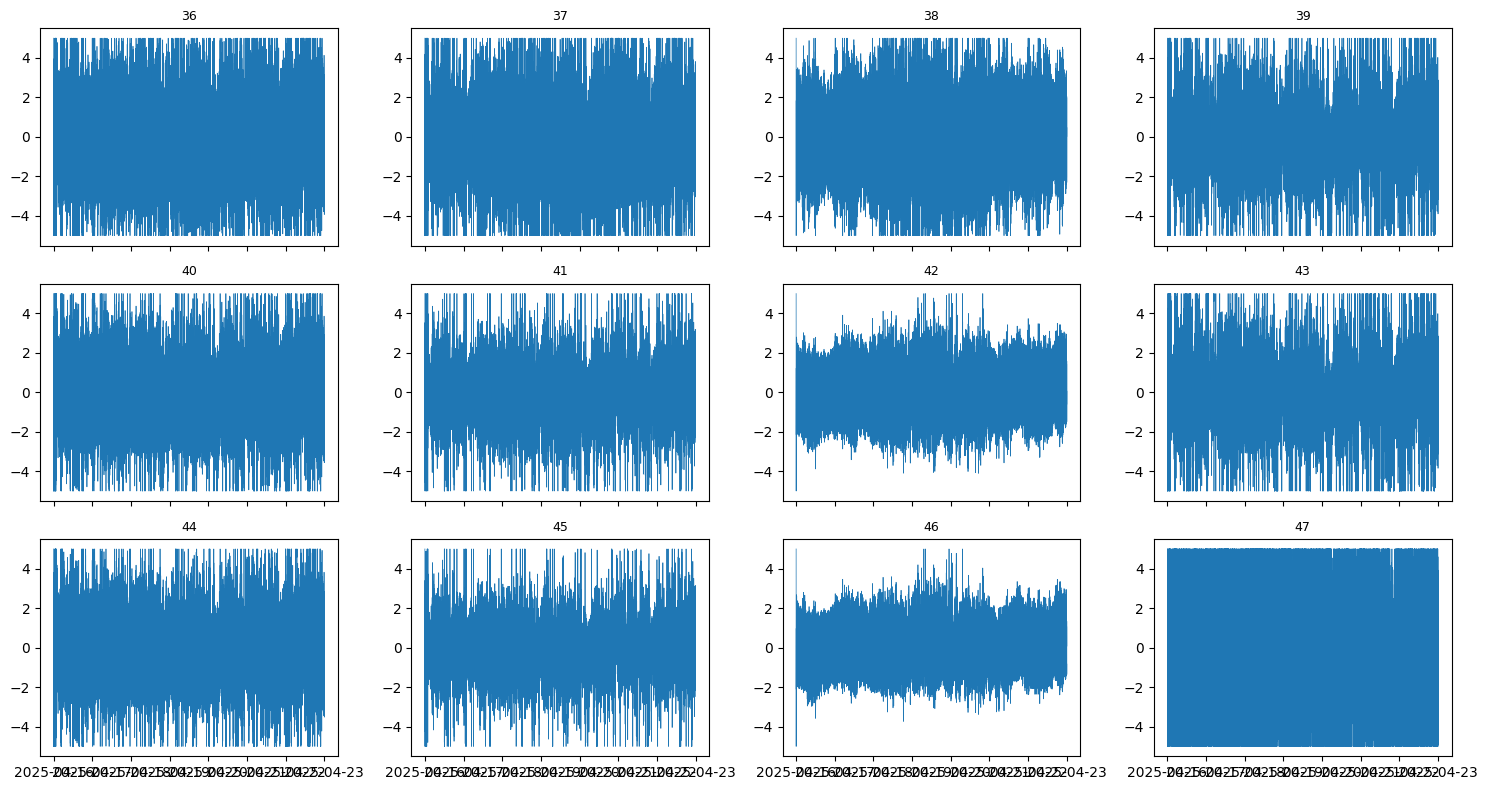

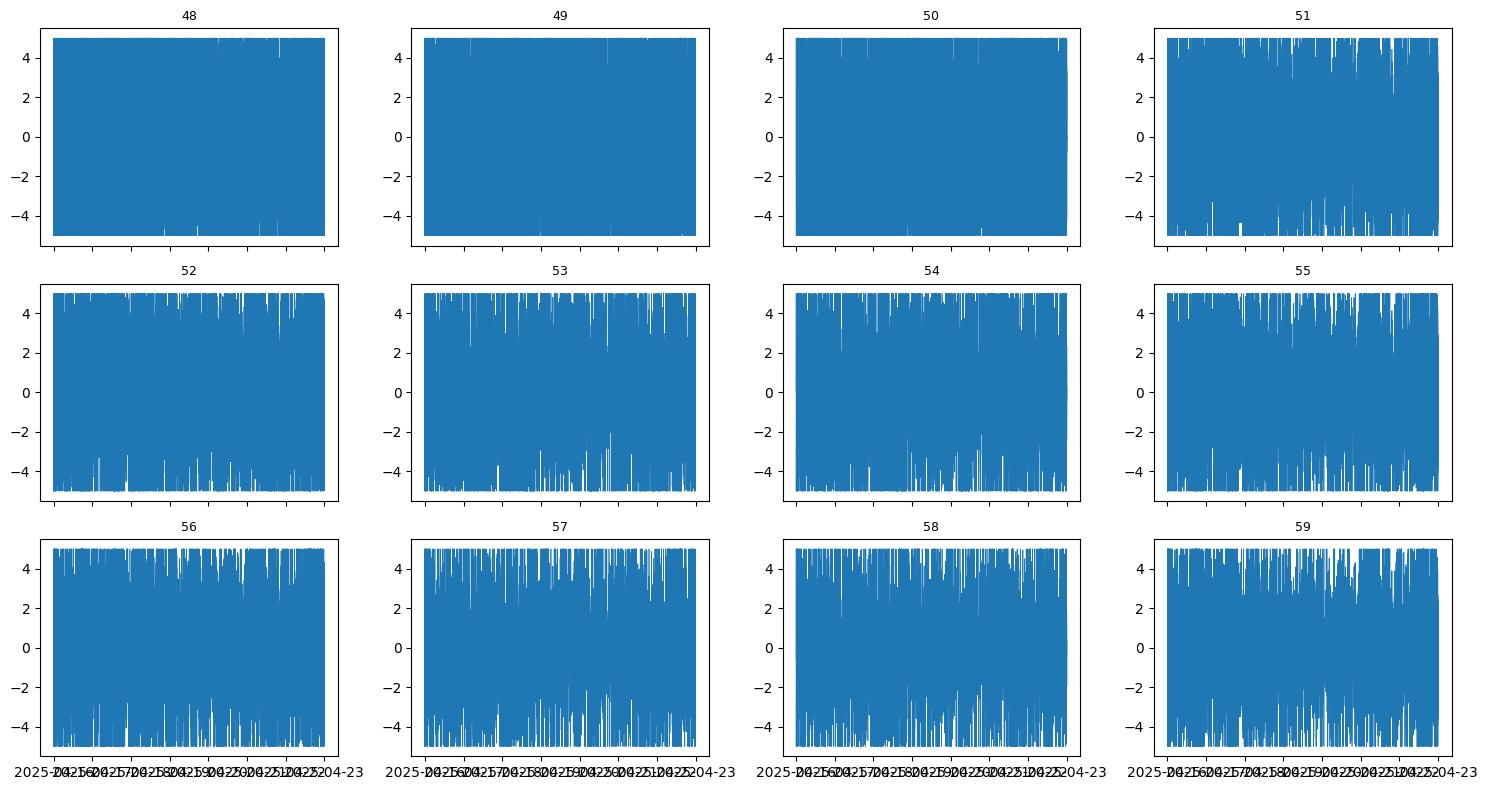

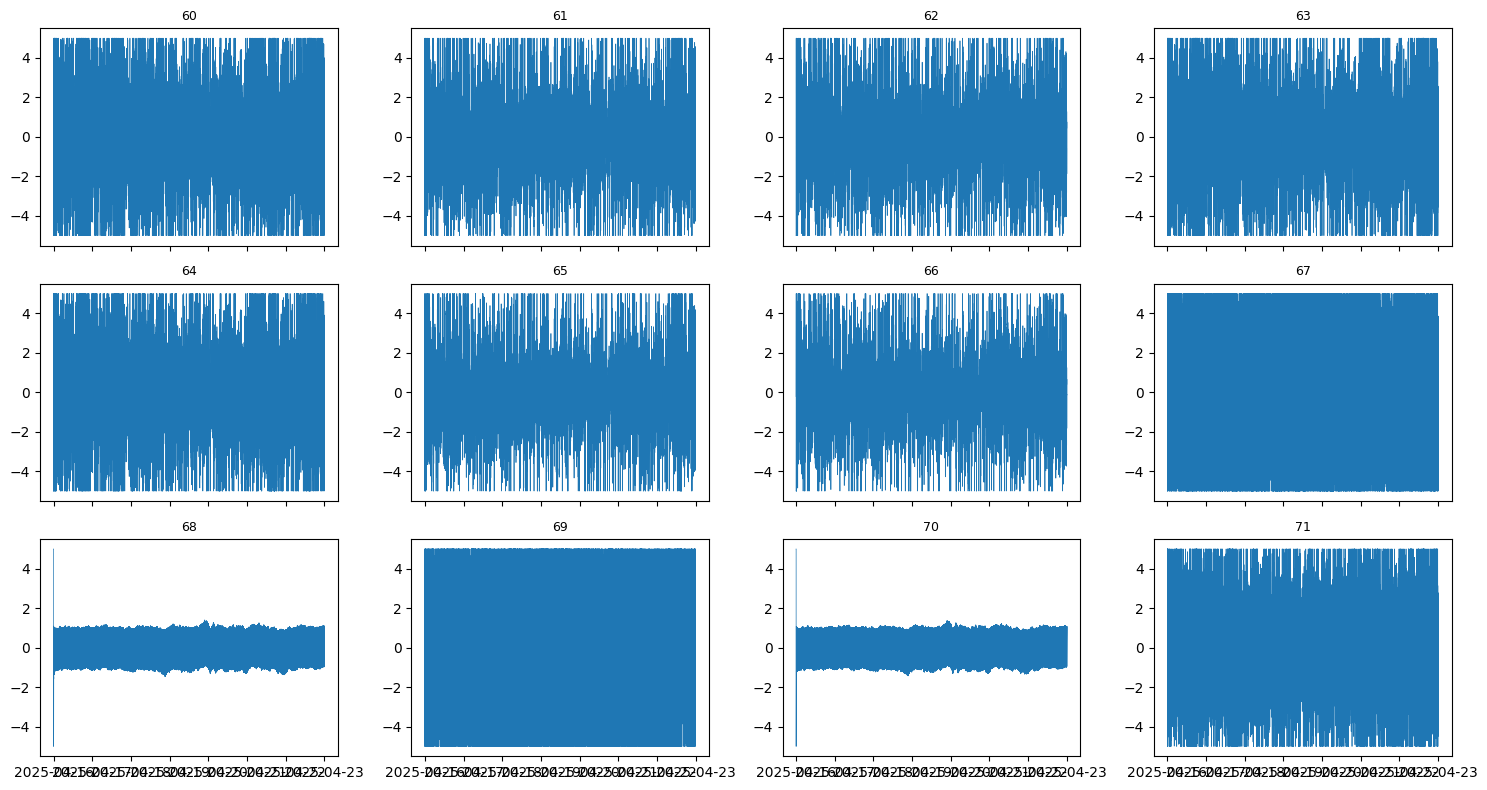

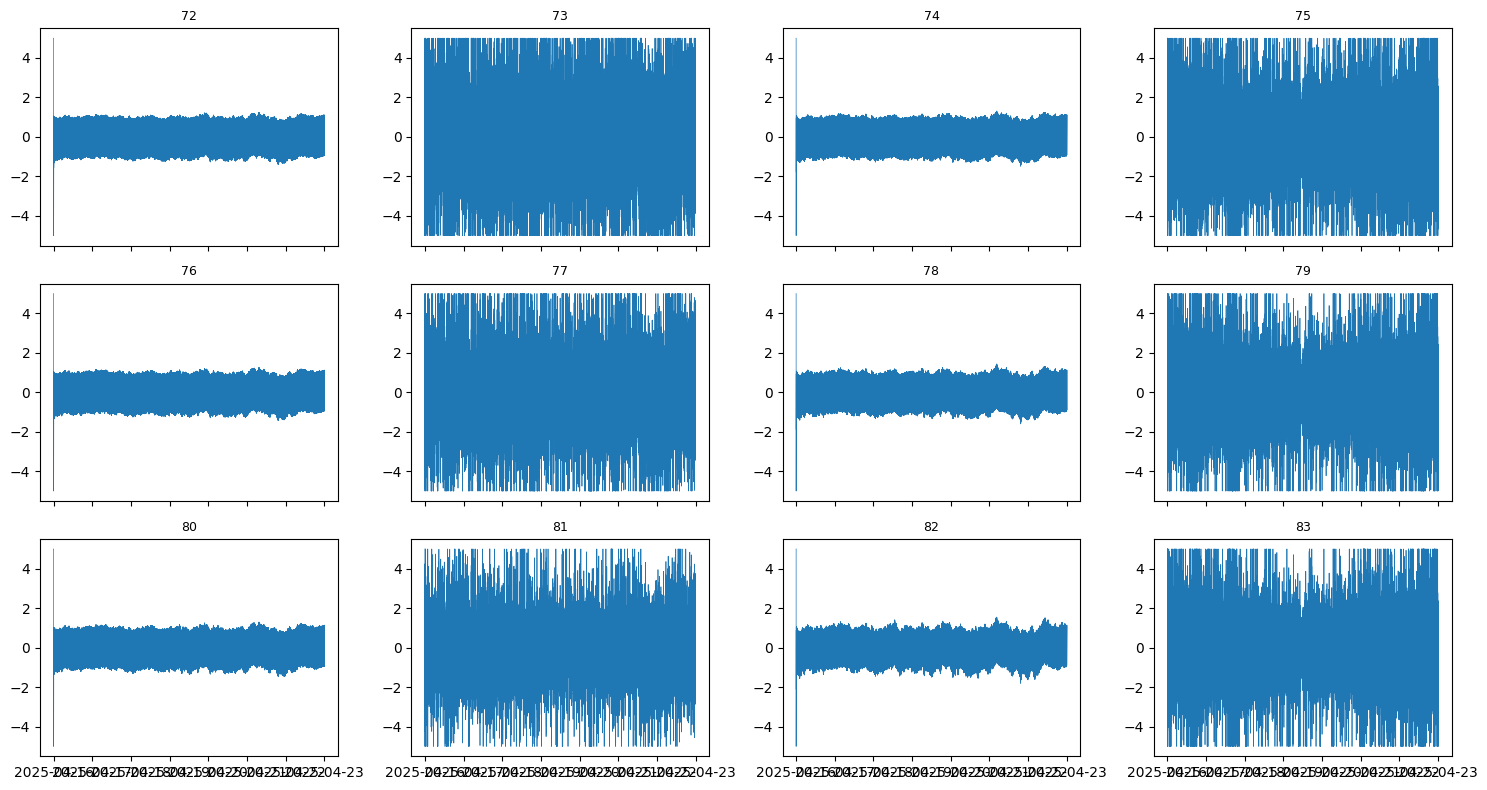

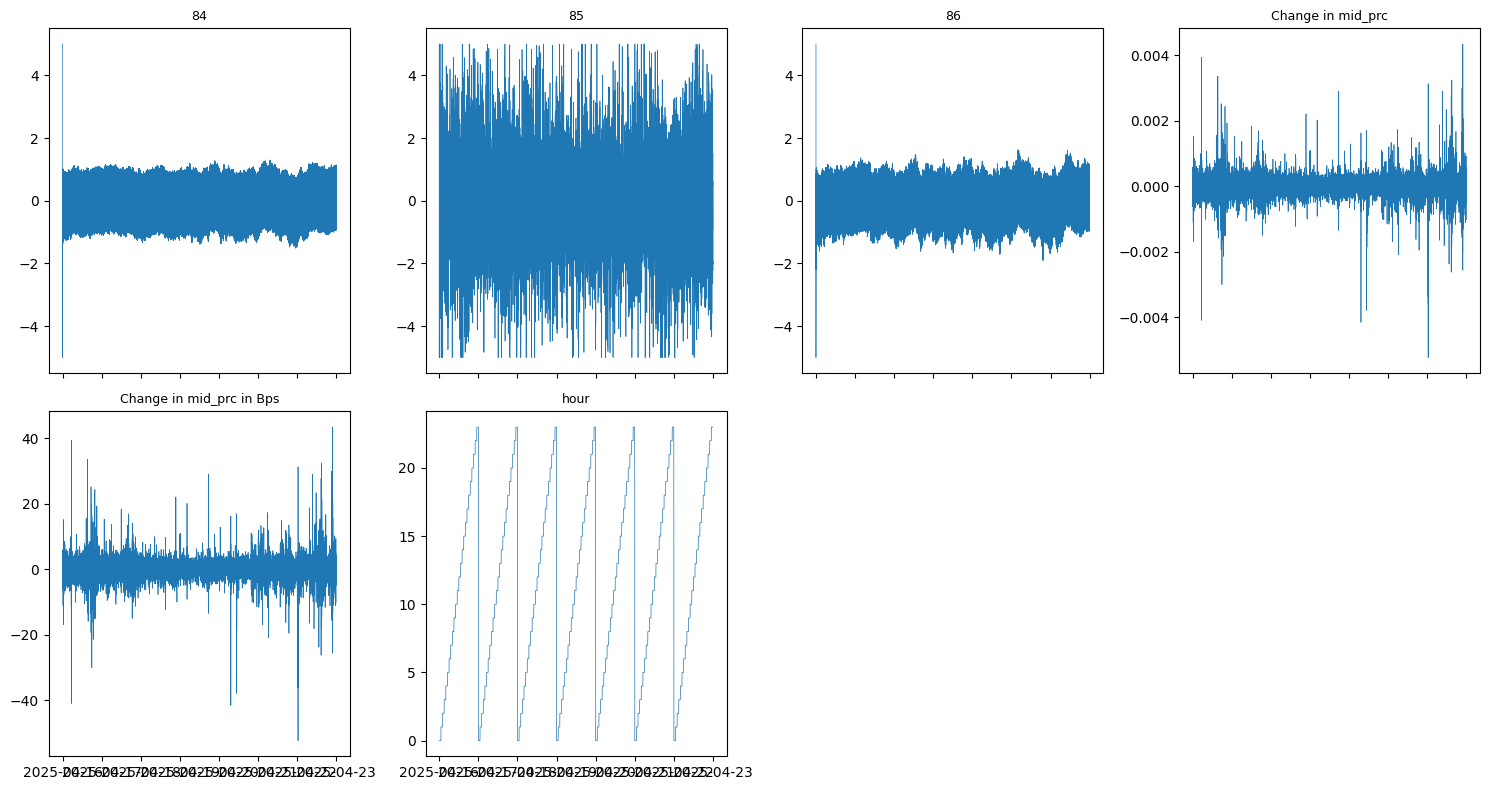

In [15]:
# Let's plot time series as well as distributions in batches
import math

def plot_time_series(df, cols=None, ncols=3, figsize=(15, 8)):
    """
    Plot multiple time series in a grid.
    df: DataFrame with DatetimeIndex
    cols: list of columns to plot (default = all)
    ncols: number of columns per row in subplot grid
    """
    if cols is None:
        cols = df.columns
    
    n_plots = len(cols)
    nrows = math.ceil(n_plots / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, sharex=True)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        axes[i].plot(df.index, df[col], linewidth=0.5)
        axes[i].set_title(col, fontsize=9)
    
    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


def plot_distributions(df, cols=None, ncols=3, figsize=(15, 8), bins=100):
    """
    Plot distributions (histogram + KDE) in a grid.
    df: DataFrame
    cols: list of columns to plot (default = all)
    ncols: number of columns per row in subplot grid
    """
    if cols is None:
        cols = df.columns
    
    n_plots = len(cols)
    nrows = math.ceil(n_plots / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.histplot(df[col].dropna(), bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(col, fontsize=9)
    
    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Plot all columns in batches of 12
for i in range(0, len(df.columns), 12):
    plot_time_series(df, cols=df.columns[i:i+12], ncols=4)


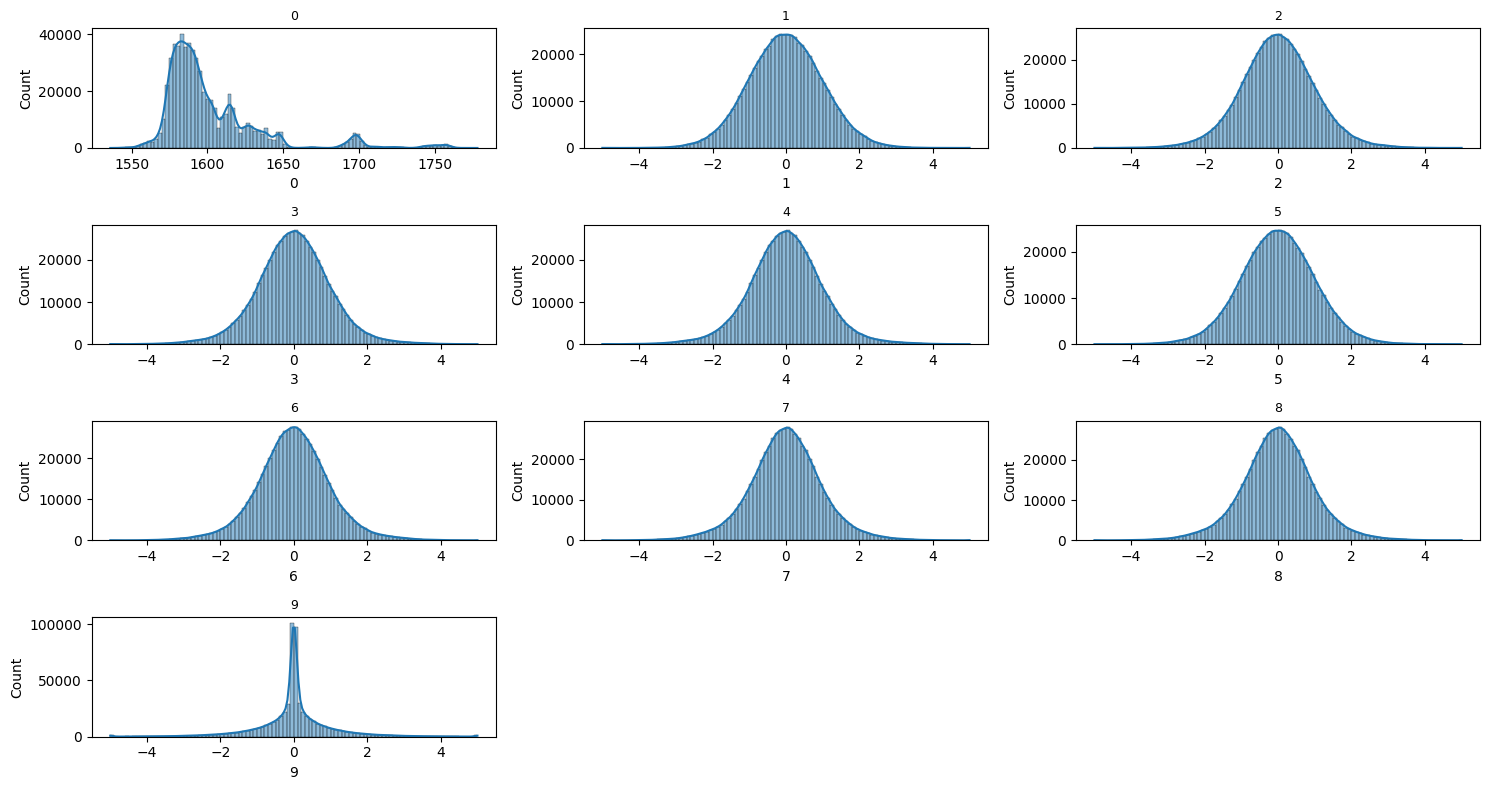

In [17]:
# Plot distributions of first 10 columns
plot_distributions(df, cols=df.columns[:10], ncols=3)

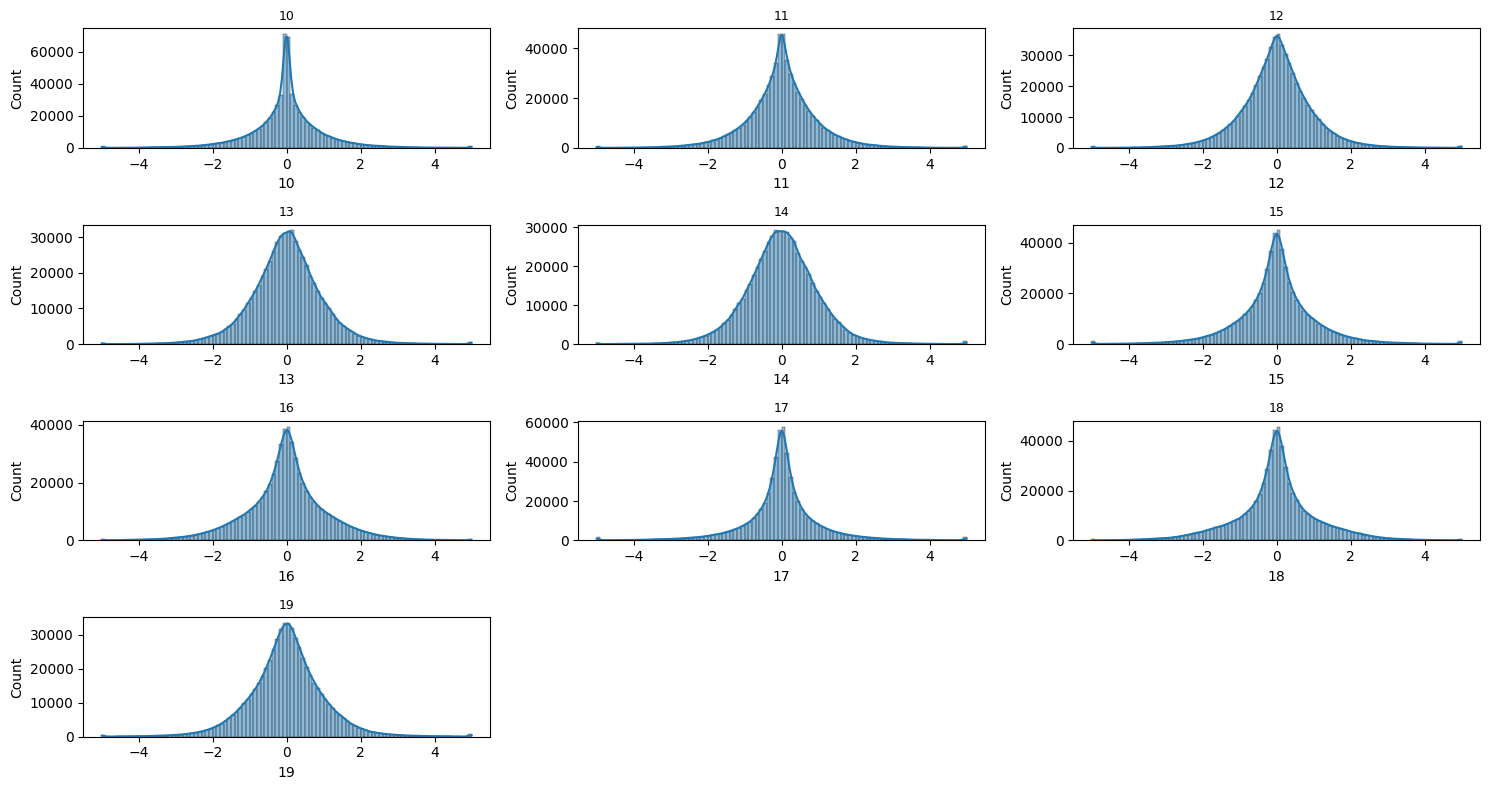

In [19]:
# Plot distributions of second 10 columns
plot_distributions(df, cols=df.columns[10:20], ncols=3)

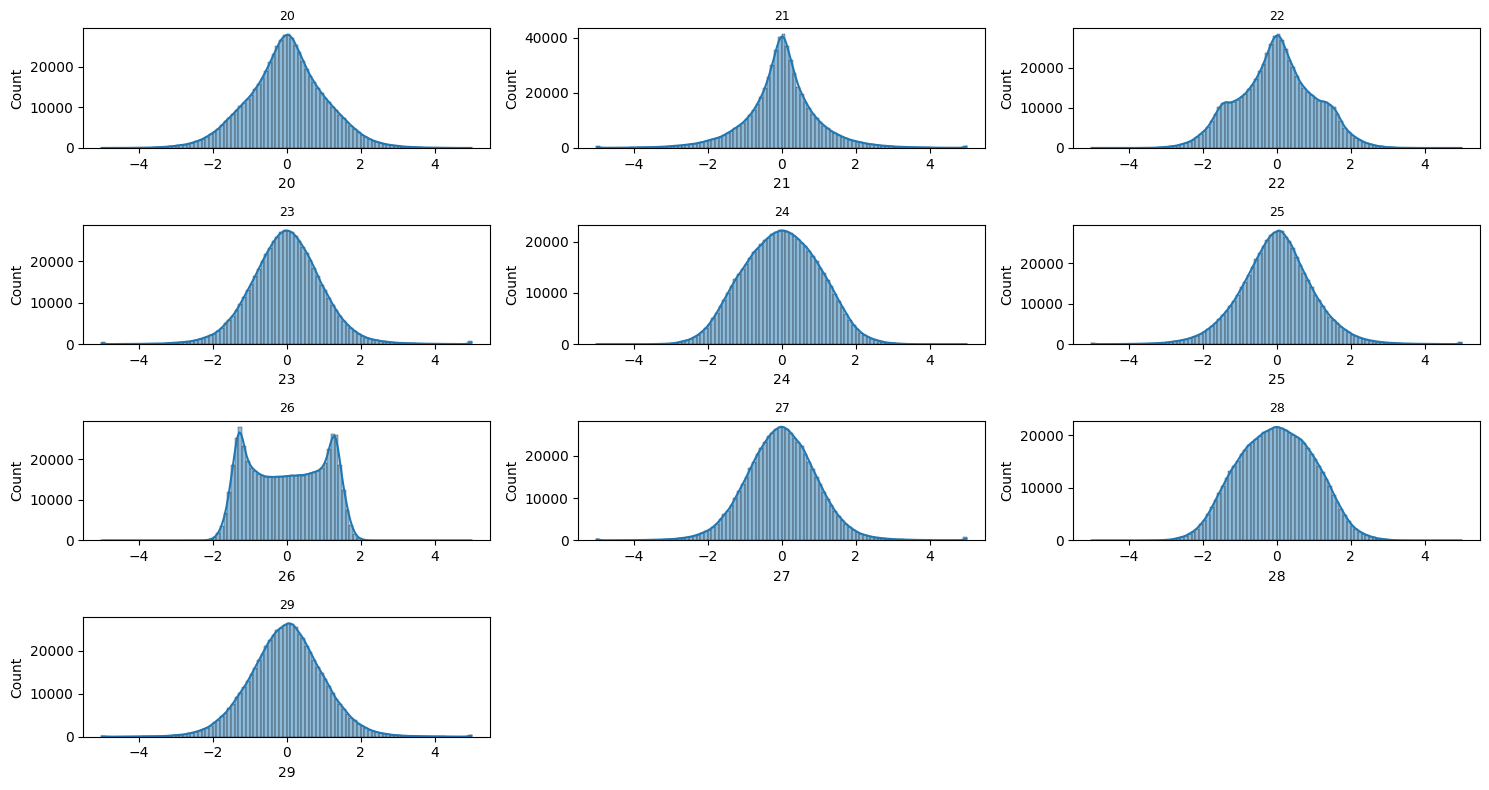

In [23]:
# Plot distributions of third 10 columns
plot_distributions(df, cols=df.columns[20:30], ncols=3)

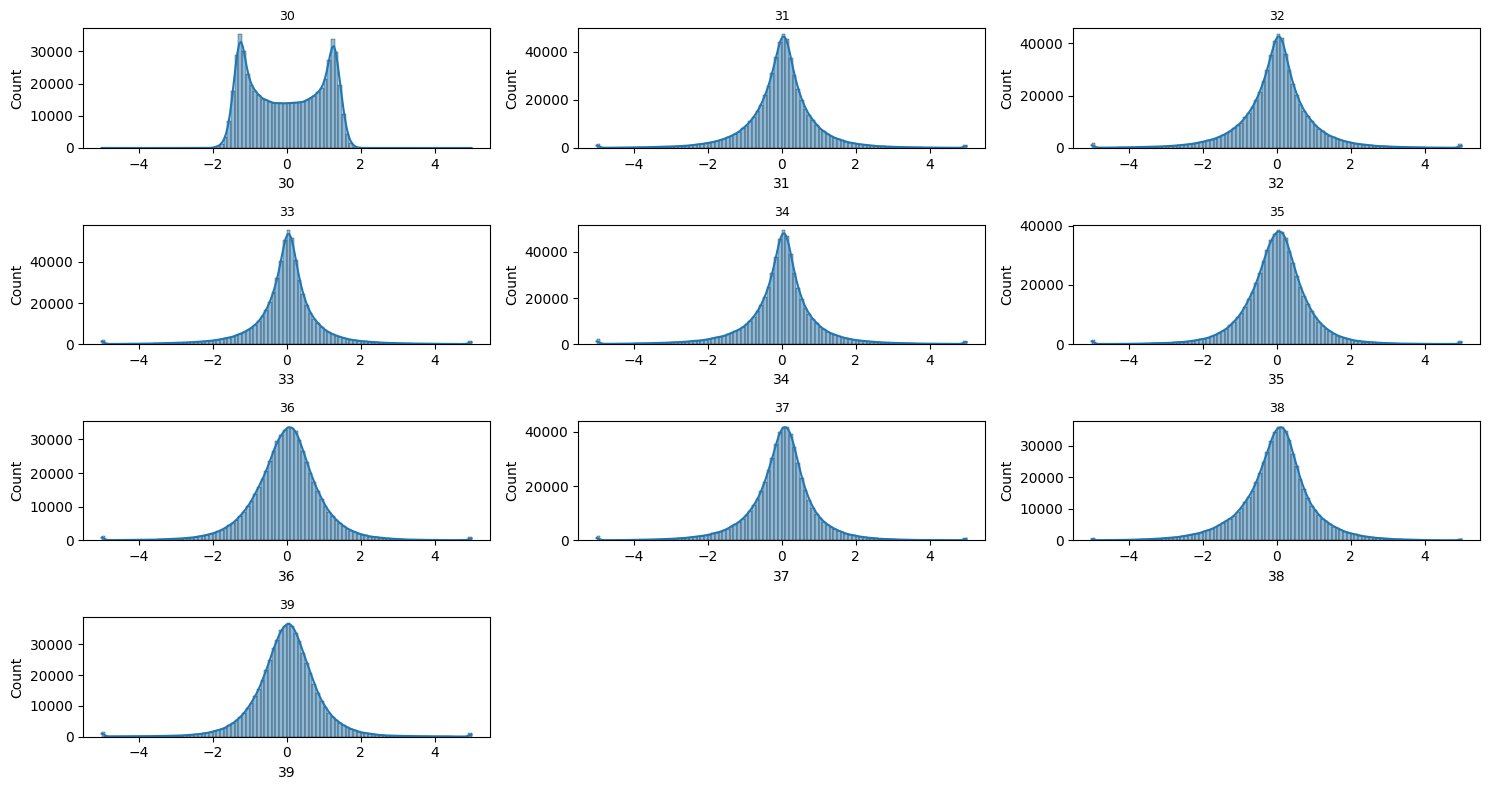

In [25]:
# Plot distributions of fourth 10 columns
plot_distributions(df, cols=df.columns[30:40], ncols=3)

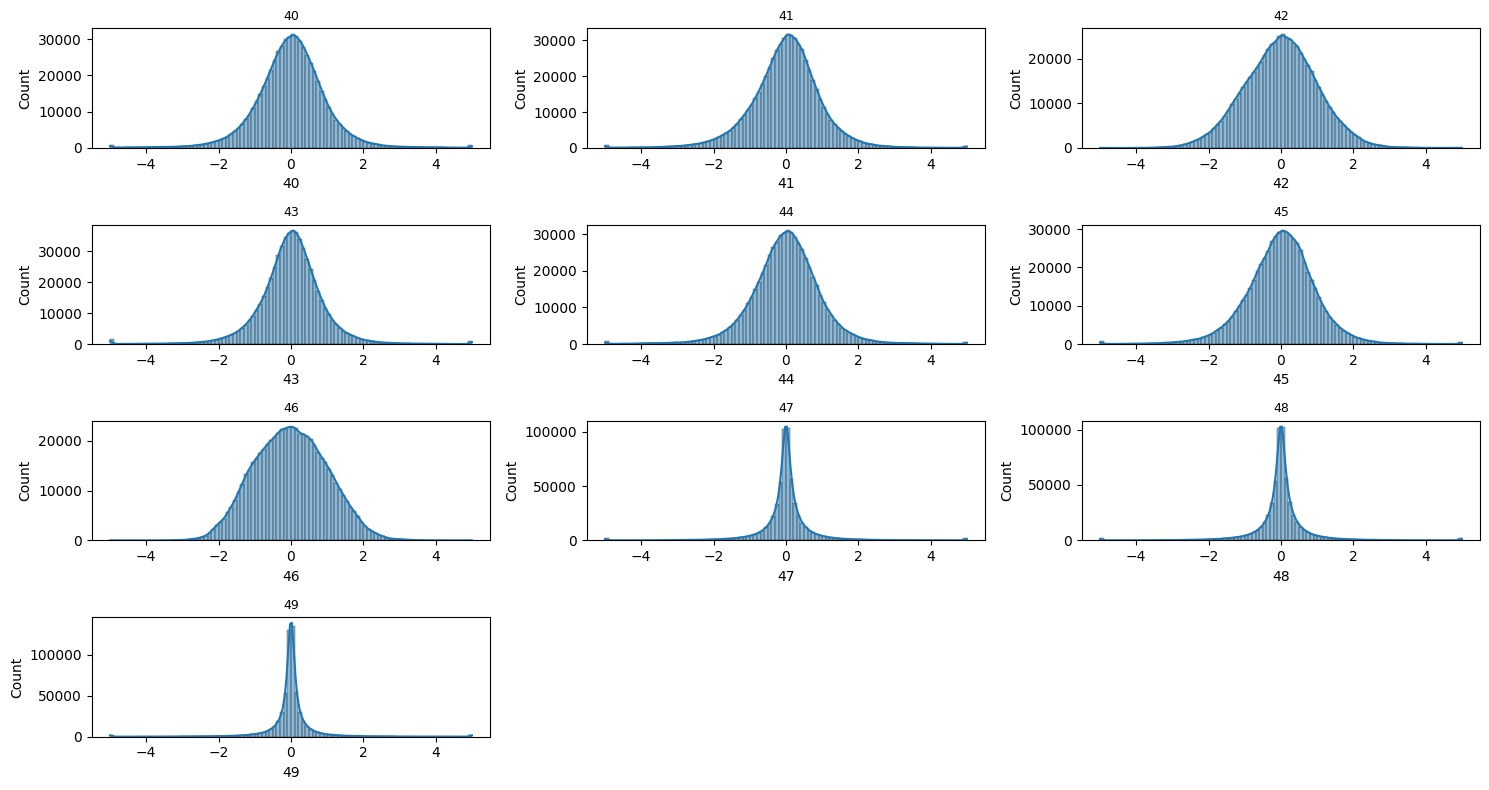

In [27]:
# Plot distributions of fifth 10 columns
plot_distributions(df, cols=df.columns[40:50], ncols=3)

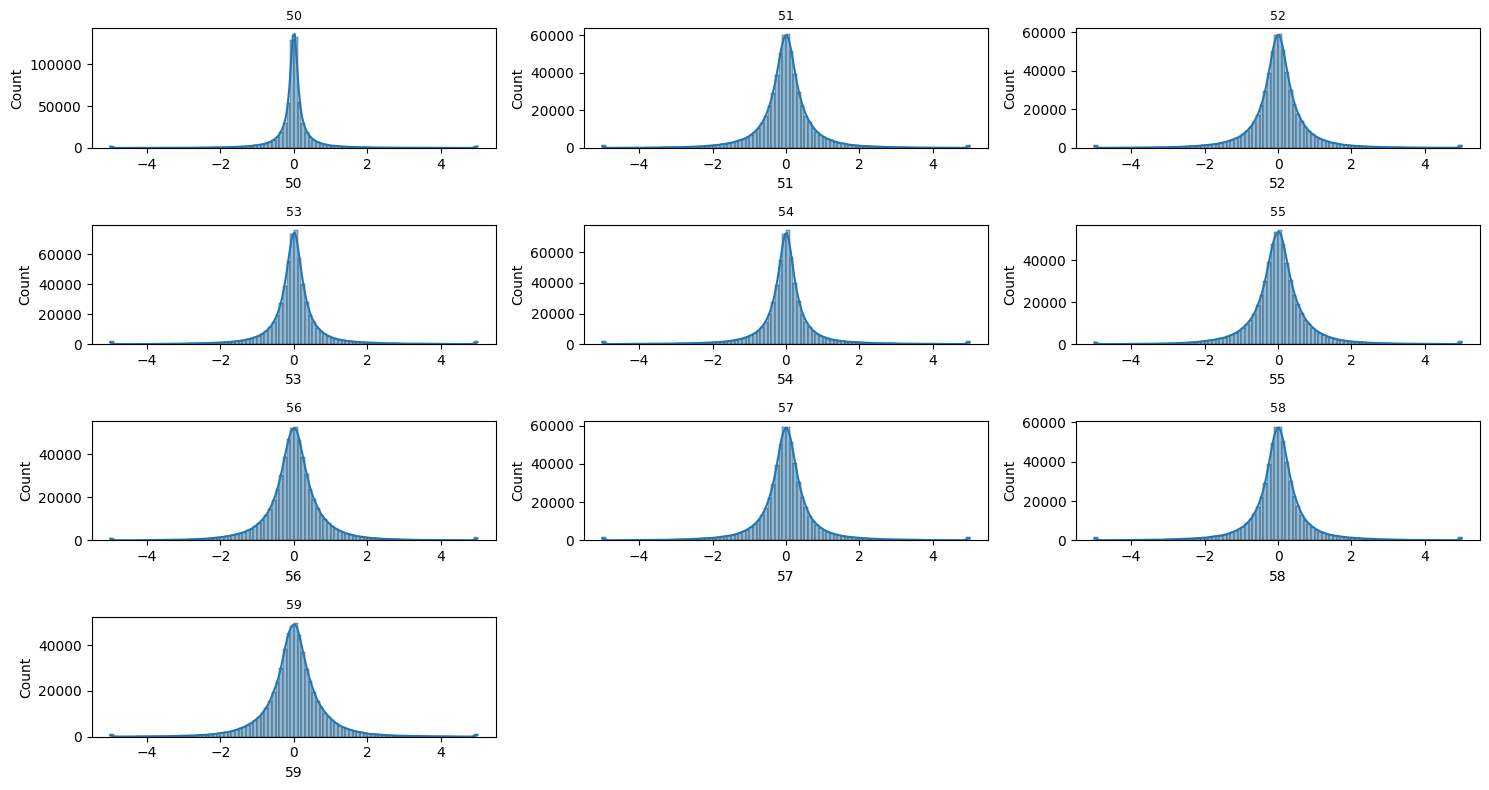

In [29]:
# Plot distributions of sixth 10 columns
plot_distributions(df, cols=df.columns[50:60], ncols=3)

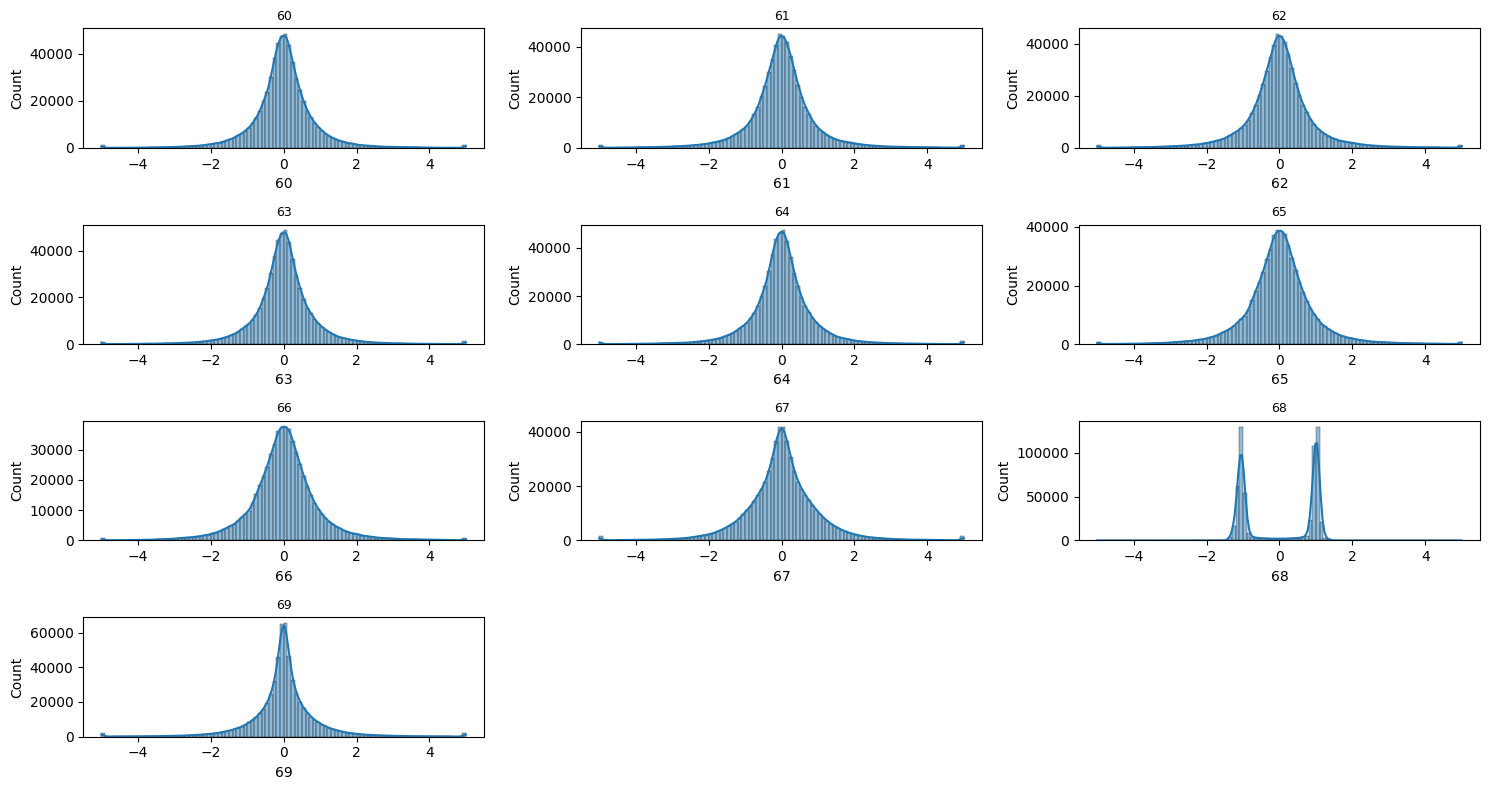

In [31]:
# Plot distributions of seventh 10 columns
plot_distributions(df, cols=df.columns[60:70], ncols=3)

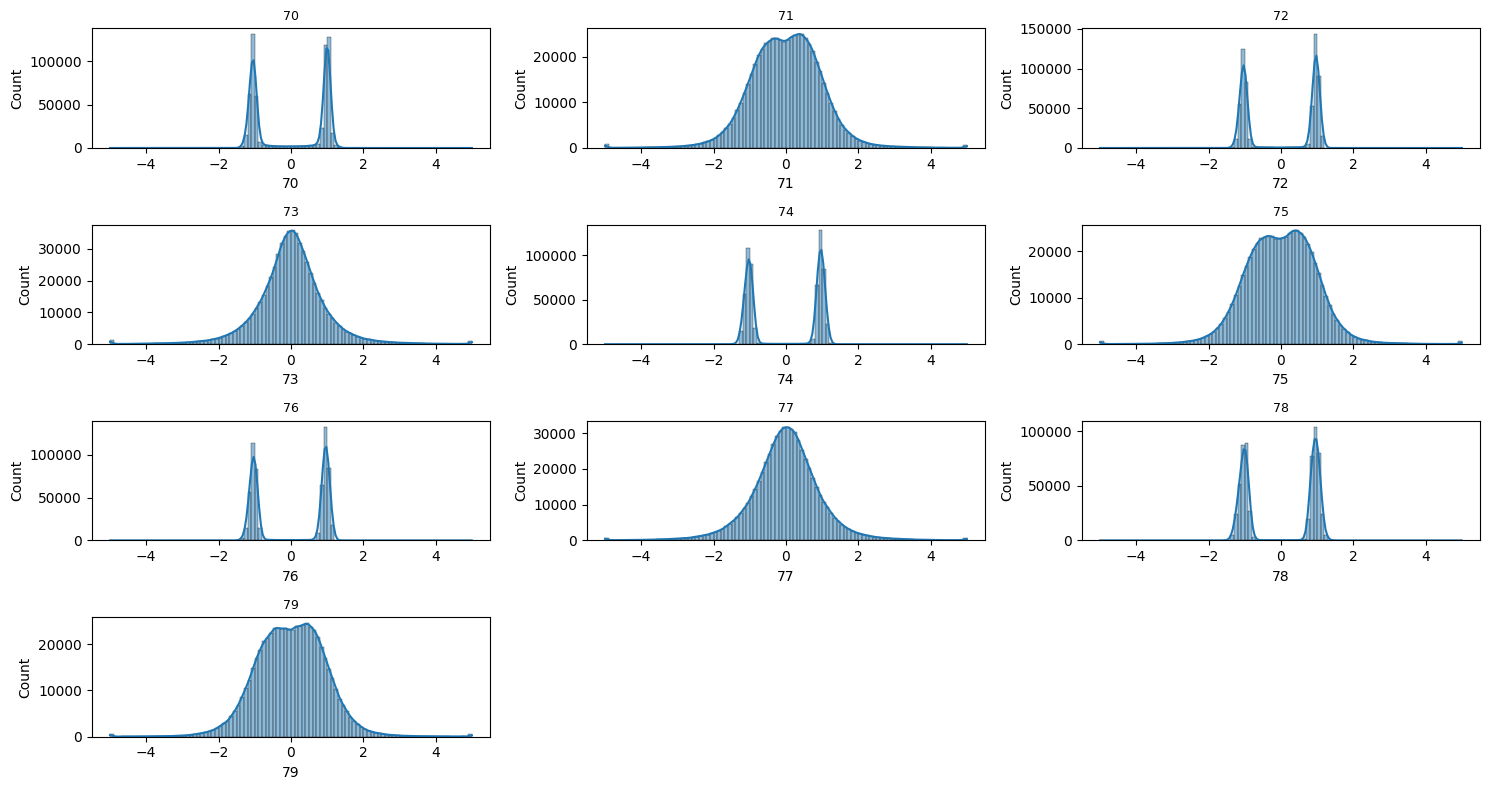

In [33]:
# Plot distributions of eighth 10 columns
plot_distributions(df, cols=df.columns[70:80], ncols=3)

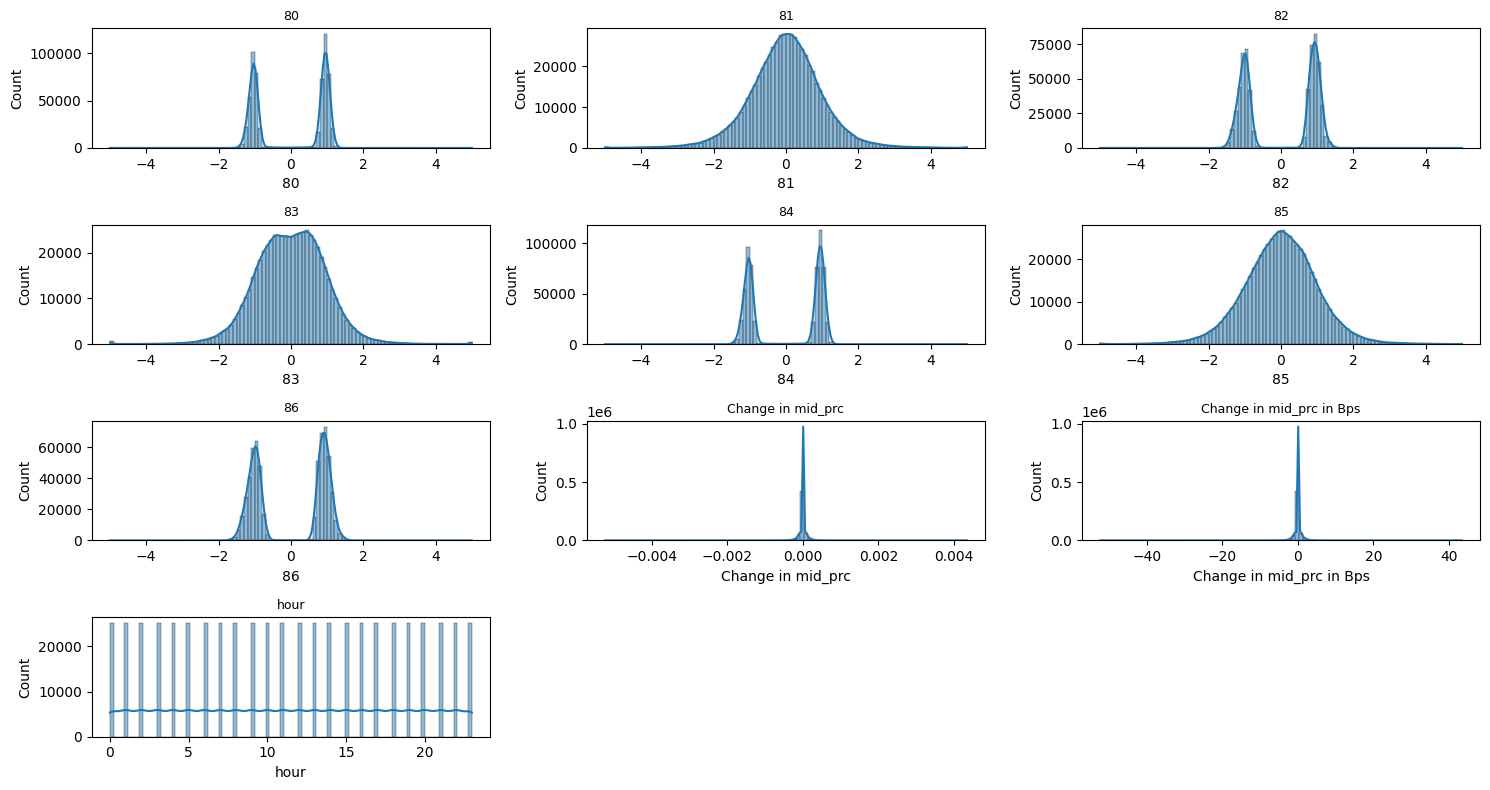

In [35]:
# Plot distributions of whatever is left
plot_distributions(df, cols=df.columns[80:], ncols=3)

In [31]:
#Let's run a PCA

#create new dataset fit for the PCA
df2=df
df2.columns = df2.columns.astype(str)

# Drop any NaNs
X = df2.dropna()

# Standardize (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Fit PCA on all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_


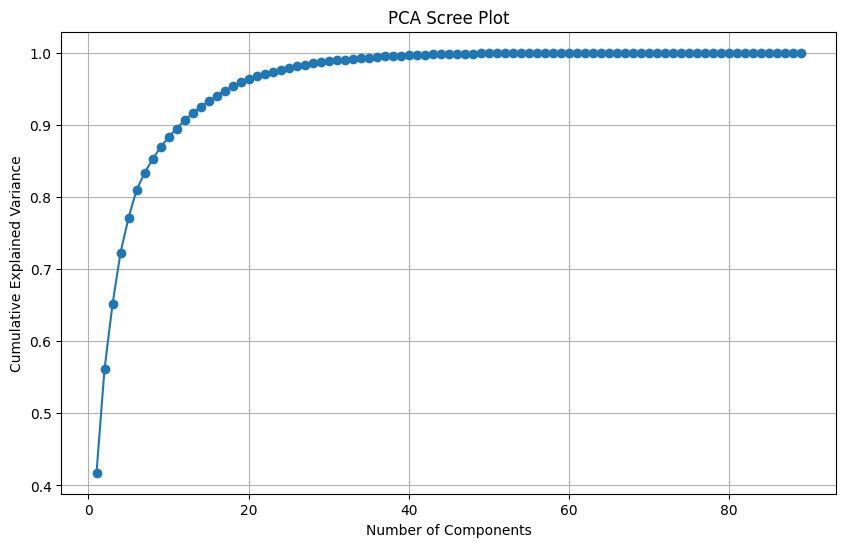

In [33]:
#Plot the PCA
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.show()


In [57]:
# As can be seen 80% of the data can be explained by the first 6 PCs
cols= X.columns

# Loadings (sensitivities to each PC)
loadings = pd.DataFrame(
    pca.components_.T,             # shape: (n_features, 6)
    index=cols,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Scale by sqrt(eigenvalues) to get variance-weighted sensitivities
eigs = pca.explained_variance_
sensitivities = loadings * np.sqrt(eigs)

In [103]:
# Get each feature sensitivity to top 6 PCs

# Now let's select the 10 features with the highest sensitivities to our 6 PCs
sens_6 = sensitivities.iloc[:, :6]

# Collect top 10 absolute sensitivities and names for each PC
top_values = {}
top_features = {}

for pc in sens_6.columns:
    sorted_vals = sens_6[pc].abs().sort_values(ascending=False).head(10)
    top_values[pc] = sorted_vals.values
    top_features[pc] = sorted_vals.index

# --- 7. Build DataFrames
top_values_df = pd.DataFrame(top_values)
top_features_df = pd.DataFrame(top_features)

print("Top 10 sensitivity values:")
print(top_values_df)

print("\nCorresponding feature names:")
print(top_features_df)

Top 10 sensitivity values:
        PC1       PC2       PC3       PC4       PC5       PC6
0  0.853153  0.636001  0.604201  0.507916  0.554546  0.398641
1  0.846723  0.606616  0.596746  0.507112  0.546055  0.398641
2  0.840912  0.602238  0.579833  0.502042  0.546018  0.385333
3  0.840138  0.600349  0.578355  0.501514  0.527609  0.359116
4  0.831916  0.586163  0.532893  0.491365  0.527608  0.346705
5  0.797673  0.583797  0.525045  0.490577  0.520492  0.342487
6  0.797524  0.576663  0.525024  0.465980  0.446696  0.342416
7  0.796484  0.574171  0.517659  0.465302  0.375760  0.341601
8  0.795367  0.568147  0.469798  0.455262  0.339523  0.339770
9  0.777051  0.568146  0.459997  0.454650  0.334736  0.329144

Corresponding feature names:
  PC1 PC2 PC3 PC4 PC5                       PC6
0  73   1  45  51   2  Change in mid_prc in Bps
1  21   2  41  52   8         Change in mid_prc
2  22  32  46  47   7                         9
3  77  31  42  48   3                        10
4  25  15  43  55   4

,PC1,PC2,PC3,PC4,PC5,PC6
0,73,1,45,51,2,Change in mid_prc in Bps
1,21,2,41,52,8,Change in mid_prc
2,22,32,46,47,7,9
3,77,31,42,48,3,10
4,25,15,43,55,4,80
5,71,16,44,56,1,84
6,29,36,39,59,6,49
7,75,35,40,60,5,50
8,26,3,67,63,35,76
9,79,4,68,64,36,83


In [105]:
#Since the change in mid_price has high sensitivity to PC1, PC3, and PC6 (inverse/negative), we can focus on these factors for the rest of the EDA
# Let's list the top 10 commomn features we have and put them in a Dataframe
# Keep only PC1, PC3, PC6 from your top_features_df
selected_pcs = ["PC1", "PC3", "PC6"]
subset_features_df = top_features_df[selected_pcs]

# Flatten into a single list
all_top_features = subset_features_df.values.ravel()

# Drop NaNs and get unique list
unique_top_features = pd.Series(all_top_features).dropna().unique().tolist()

print("Unique top features across PC1, PC3, PC6:")
print(unique_top_features)
print("\nTotal unique features:", len(unique_top_features))

Unique top features across PC1, PC3, PC6:
['73', '45', 'Change in mid_prc in Bps', '21', '41', 'Change in mid_prc', '22', '46', '9', '77', '42', '10', '25', '43', '80', '71', '44', '84', '29', '39', '49', '75', '40', '50', '26', '67', '76', '79', '68', '83']

Total unique features: 30


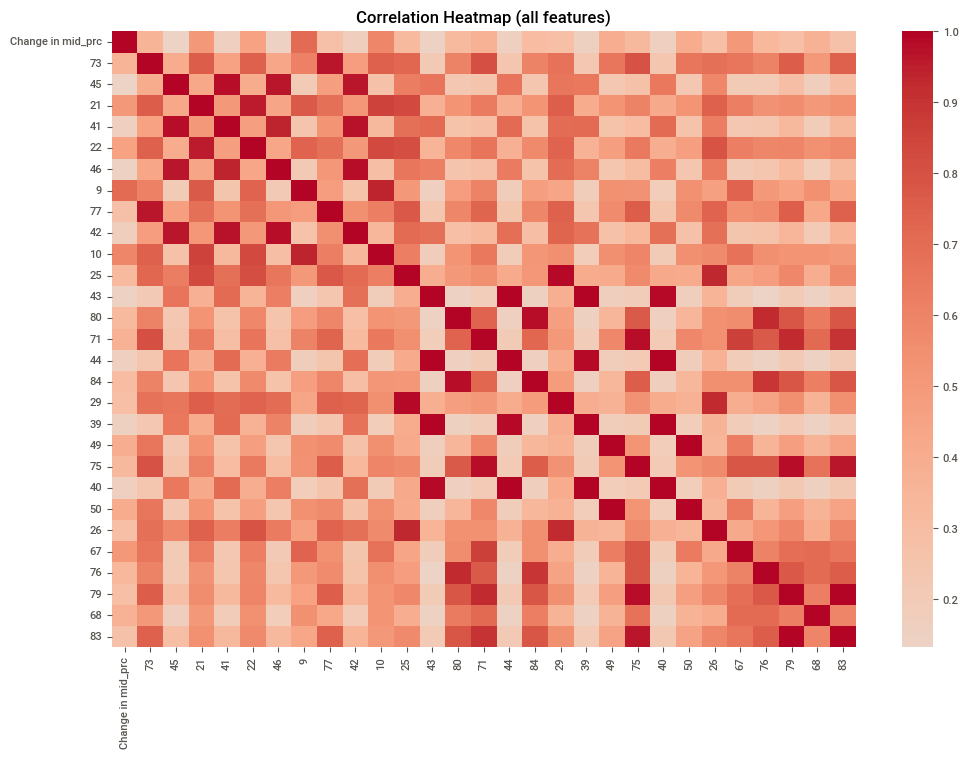

In [262]:
# let's use the unique features to filter through the main dataset
df_reduced = df[['Change in mid_prc', '73', '45', '21', '41', '22', '46', '9', '77', '42', '10', '25', '43', '80', '71', '44', '84', '29', '39', '49', '75', '40', '50', '26', '67', '76', '79', '68', '83']].dropna()

# Heatmap for the new dataframe
plt.figure(figsize=(12,8))
sns.heatmap(df_reduced.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (all features)")
plt.show()

# Correlations appear not to be as meaningful with all the features, let's rerun a new PCA

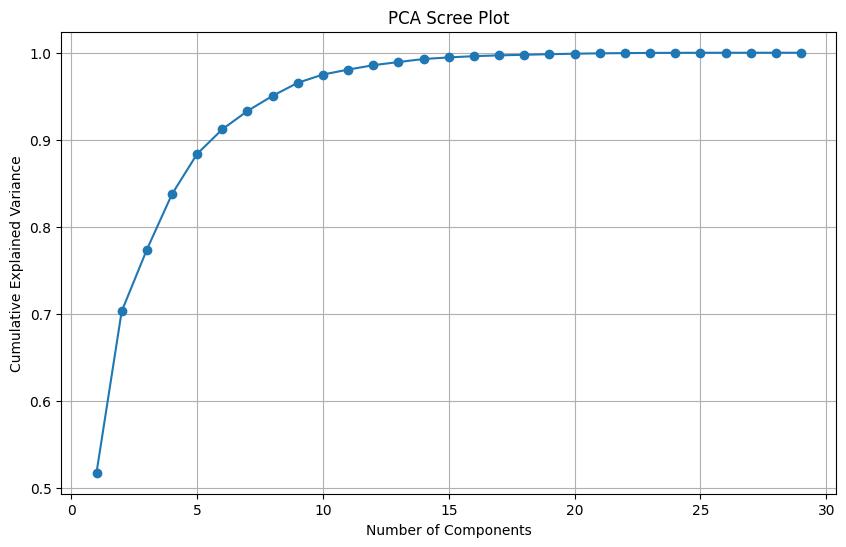

In [127]:
# Standardize
scaler = StandardScaler()
X_scaled_reduced = scaler.fit_transform(df_reduced)


# Fit PCA on all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled_reduced)

# Explained variance ratio
explained_var_reduced = pca.explained_variance_ratio_

#Plot the PCA
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var_reduced)+1), explained_var_reduced.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.show()



In [131]:
# As can be seen 90% of the data can be explained by the first 5 PCs
cols= df_reduced.columns

# Loadings (sensitivities to each PC)
loadings = pd.DataFrame(
    pca.components_.T,             # shape: (n_features, 6)
    index=cols,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Scale by sqrt(eigenvalues) to get variance-weighted sensitivities
eigs = pca.explained_variance_
sensitivities = loadings * np.sqrt(eigs)

In [139]:
# Get each feature sensitivity to top 5 PCs

# Now let's select the 10 features with the highest sensitivities to our 5 PCs
sens_5 = sensitivities.iloc[:, :5]

# Collect top 10 absolute sensitivities and names for each PC
top_values = {}
top_features = {}

for pc in sens_5.columns:
    sorted_vals = sens_5[pc].abs().sort_values(ascending=False).head(10)
    top_values[pc] = sorted_vals.values
    top_features[pc] = sorted_vals.index

# --- 7. Build DataFrames
top_values_df_reduced = pd.DataFrame(top_values)
top_features_df_reduced = pd.DataFrame(top_features)

print("Top 10 sensitivity values:")
print(top_values_df_reduced)

print("\nCorresponding feature names:")
print(top_features_df_reduced)

Top 10 sensitivity values:
        PC1       PC2       PC3       PC4       PC5
0  0.865569  0.737830  0.510027  0.444388  0.542588
1  0.856530  0.732037  0.499251  0.430402  0.541069
2  0.854327  0.726137  0.443957  0.427298  0.287158
3  0.846364  0.721249  0.443095  0.422326  0.282890
4  0.840319  0.660687  0.419189  0.417162  0.279440
5  0.837635  0.657866  0.388942  0.408507  0.245057
6  0.837418  0.631004  0.384875  0.398497  0.239645
7  0.816156  0.621502  0.370342  0.281962  0.231574
8  0.815831  0.398766  0.344623  0.263393  0.210104
9  0.809425  0.387952  0.338311  0.253655  0.177375

Corresponding feature names:
  PC1 PC2                       PC3 PC4                       PC5
0  73  43                         9  29                        49
1  22  44  Change in mid_prc in Bps  39                        50
2  21  39                        49  43  Change in mid_prc in Bps
3  25  40                        50  40                        22
4  77  45                        10  44  

In [141]:
# It appears that "Change in mid_prc in Bps" has great sensitivity to PC1 and PC3
# Let's list the commomn features we have and put them in a Dataframe
# Keep only PC1 and PC3
selected_pcs_reduced = ["PC1", "PC3"]
subset_features_df_reduced = top_features_df_reduced[selected_pcs_reduced]

# Flatten into a single list
all_top_features_reduced = subset_features_df_reduced.values.ravel()

# Drop NaNs and get unique list
unique_top_features_reduced = pd.Series(all_top_features_reduced).dropna().unique().tolist()

print("Unique top features across PC1 and PC3")
print(unique_top_features_reduced)
print("\nTotal unique features:", len(unique_top_features_reduced))


Unique top features across PC1 and PC3
['73', '9', '22', 'Change in mid_prc in Bps', '21', '49', '25', '50', '77', '10', '71', '84', '75', '80', '79', '83', '26', '29', '76']

Total unique features: 19


In [264]:
df

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,Change in mid_prc,mid_direction,ret,Y_true_future,ret_fut,Y_true_f
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-04-16 00:00:05,1588.010010,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,0,NaN,-1,-0.000327,-1
2025-04-16 00:00:06,1587.824951,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.601331,...,5.000000,5.000000,-0.774996,-5.000000,-0.000117,-1,-0.000117,-1,-0.000013,-1
2025-04-16 00:00:07,1587.824951,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.322740,...,5.000000,5.000000,-0.024244,-3.626100,0.000000,0,0.000000,1,0.000069,1
2025-04-16 00:00:08,1587.305054,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-4.419014,-5.000000,-5.000000,-5.000000,-0.000327,-1,-0.000327,1,0.000025,1
2025-04-16 00:00:09,1587.285034,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-4.966719,-5.000000,-5.000000,-5.000000,-0.000013,-1,-0.000013,-1,-0.000284,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-22 23:59:55,1755.185059,1.592446,1.272337,1.085889,1.085897,1.808142,1.540320,0.781662,0.772978,1.297135,...,1.395461,1.142015,0.385636,1.169348,0.000194,1,0.000194,0,0.000000,0
2025-04-22 23:59:56,1755.185059,-0.445452,-0.207513,-0.236142,-0.236145,-0.388044,-0.064191,-0.665100,-0.659043,0.618027,...,1.247377,1.141478,0.357416,1.168783,0.000000,0,0.000000,0,0.000000,0
2025-04-22 23:59:57,1755.574951,1.179695,0.758192,0.622311,0.622315,2.198675,1.170764,0.899781,0.889898,1.536343,...,1.001346,1.140982,0.605599,1.168262,0.000222,1,0.000222,<NA>,NaN,<NA>


In [155]:
# Now that we have filtered through the dataset and kept a selction of potentially important features
# Let's see if we can get some predictive power on our target variable Change in mid_price
# Hot encoding of 1 for positive change, 0 for no change (10^(-6) price change), and -1 for negative change
# Target variable
df["mid_direction"] = df["Change in mid_prc"].apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0)
)

df.columns = df.columns.astype(str)
# Check distribution of labels
print(df["mid_direction"].value_counts(normalize=True))

selected_features = [
    '73', '9', '22', '21', '49', 
    '25', '50', '77', '10', '71', '84', '75', '80', 
    '79', '83', '26', '29', '76'
]

 0    0.591825
-1    0.204455
 1    0.203720
Name: mid_direction, dtype: float64


In [157]:
# forecast horizon: predict the move h steps ahead: 1, 2, 3, etc
h = 2

# Compute per-step return from mid-price change (bps → decimal)
df["ret"] = df["Change in mid_prc"].astype(float)

# Target = sign of *future* return at t+h  → shift(-h)
df["Y_true_future"] = np.sign(df["ret"].shift(-h)).astype("Int64")  # {-1,0,1, <NA>}

# Build features X and labels y aligned at *decision time t*
# (drop the last h rows which don't have future label)
X = df.loc[:, selected_features]          # or df.drop(columns=[..]) if you used all features
Y = df["Y_true_future"]

# Drop rows with NA in y (tail) to align X and y
mask = Y.notna()
X, Y = X.loc[mask], Y.loc[mask].astype(int)

In [159]:
#Let's split, train, and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=False  # timeseries
)

# Let's use some random forest classifiers
clf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42, n_jobs=-1
)
clf.fit(X_train, Y_train)

Y_pred_rf1 = clf.predict(X_test)

print(classification_report(Y_test, Y_pred_rf1))
print(confusion_matrix(Y_test, Y_pred_rf1))


              precision    recall  f1-score   support

          -1       0.48      0.09      0.16     33412
           0       0.48      0.96      0.64     54081
           1       0.48      0.10      0.17     33383

    accuracy                           0.48    120876
   macro avg       0.48      0.39      0.32    120876
weighted avg       0.48      0.48      0.38    120876

[[ 3119 27682  2611]
 [ 1054 51953  1074]
 [ 2302 27638  3443]]


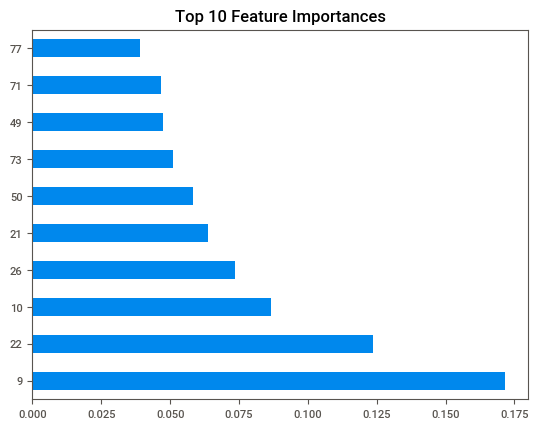

In [29]:
# Let's check on which 10 features matter most

feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.show()


In [163]:
#Let's see if there's any performance improvement by running a random forest on the Top 10 features
top_10 = ["9", "10", "22", "21", "50", "49", "71", "73", "77", "75"]

X2= df[top_10]


# Align X2 and Y on their common index
X2, Y = X2.align(Y, join="inner", axis=0)

print("Shapes after align:", X2.shape, Y.shape)  # should match

# Split train/test (time-series safe, no shuffle)
X2_train, X2_test, Y_train, Y_test = train_test_split(
    X2, Y, test_size=0.2, shuffle=False
)

# Let's use some random forest classifiers
clf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42, n_jobs=-1
)
clf.fit(X2_train, Y_train)

Y_pred_rf2 = clf.predict(X2_test)

print(classification_report(Y_test, Y_pred_rf2))
print(confusion_matrix(Y_test, Y_pred_rf2))


Shapes after align: (604377, 10) (604377,)
              precision    recall  f1-score   support

          -1       0.49      0.09      0.15     33412
           0       0.48      0.96      0.64     54081
           1       0.48      0.09      0.16     33383

    accuracy                           0.48    120876
   macro avg       0.48      0.38      0.32    120876
weighted avg       0.48      0.48      0.37    120876

[[ 3031 28035  2346]
 [  951 52160   970]
 [ 2227 28040  3116]]


In [165]:
# Since there's no major improvement on either precision or accuracy by scaling down on features
# let's check with having all features used
all_features= df.columns.tolist()

X3= df[all_features[1:86]]

# Align X2 and Y on their common index
X3, Y = X3.align(Y, join="inner", axis=0)

print("Shapes after align:", X2.shape, Y.shape)  # should match

# Split train/test (time-series safe, no shuffle)
X3_train, X3_test, Y_train, Y_test = train_test_split(
    X3, Y, test_size=0.2, shuffle=False
)

# Let's use some random forest classifiers
clf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42, n_jobs=-1
)
clf.fit(X3_train, Y_train)

Y_pred_rf3 = clf.predict(X3_test)

print(classification_report(Y_test, Y_pred_rf3))
print(confusion_matrix(Y_test, Y_pred_rf3))



Shapes after align: (604377, 10) (604377,)
              precision    recall  f1-score   support

          -1       0.50      0.12      0.20     33412
           0       0.49      0.95      0.65     54081
           1       0.49      0.12      0.19     33383

    accuracy                           0.49    120876
   macro avg       0.50      0.40      0.34    120876
weighted avg       0.49      0.49      0.40    120876

[[ 4068 26694  2650]
 [ 1382 51306  1393]
 [ 2633 26799  3951]]


In [167]:
# It looks that there's no improvement coming from features addition or substraction
# Let's test other models: first a multinomial logistic model

log_reg = LogisticRegression(
    multi_class="multinomial", 
    solver="lbfgs", 
    max_iter=1000, 
    class_weight="balanced"  # helpful if many 0s vs few -1/+1
)

log_reg.fit(X_train, Y_train)

Y_pred_log1 = log_reg.predict(X_test)
Y_prob_log1 = log_reg.predict_proba(X_test)

print("Classification Report (Logistic Regression):")
print(classification_report(Y_test, Y_pred_log1))
print(confusion_matrix(Y_test, Y_pred_log1))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          -1       0.35      0.52      0.42     33412
           0       0.55      0.21      0.31     54081
           1       0.35      0.52      0.42     33383

    accuracy                           0.38    120876
   macro avg       0.41      0.42      0.38    120876
weighted avg       0.44      0.38      0.37    120876

[[17401  4791 11220]
 [21423 11502 21156]
 [11547  4588 17248]]


In [169]:
# Logistic perform a bit worse
# let's scale back with less features: top 10

log_reg.fit(X2_train, Y_train)

Y_pred_log2 = log_reg.predict(X2_test)
Y_prob_log2 = log_reg.predict_proba(X2_test)

print("Classification Report (Logistic Regression):")
print(classification_report(Y_test, Y_pred_log2))
print(confusion_matrix(Y_test, Y_pred_log2))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          -1       0.34      0.52      0.42     33412
           0       0.55      0.20      0.29     54081
           1       0.34      0.52      0.41     33383

    accuracy                           0.38    120876
   macro avg       0.41      0.41      0.37    120876
weighted avg       0.44      0.38      0.36    120876

[[17512  4435 11465]
 [21735 10720 21626]
 [11682  4392 17309]]


In [171]:
# Likewise, there's a slight improvement with top10 features
# let's check with having all features used

log_reg.fit(X3_train, Y_train)

Y_pred_log3 = log_reg.predict(X3_test)
Y_prob_log3 = log_reg.predict_proba(X3_test)

print("Classification Report (Logistic Regression):")
print(classification_report(Y_test, Y_pred_log3))
print(confusion_matrix(Y_test, Y_pred_log3))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          -1       0.37      0.52      0.43     33412
           0       0.54      0.25      0.35     54081
           1       0.36      0.52      0.43     33383

    accuracy                           0.40    120876
   macro avg       0.42      0.43      0.40    120876
weighted avg       0.44      0.40      0.39    120876

[[17451  5684 10277]
 [20040 13704 20337]
 [10294  5773 17316]]


In [173]:
# Create dataset
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data)

# LightGBM classifier (sklearn API)
gbm = lgb.LGBMClassifier(
    objective="multiclass",
    boosting_type="gbdt",
    n_estimators=2000,        # big; early stopping will cut it
    learning_rate=0.05,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,            # bagging_fraction
    colsample_bytree=0.8,     # feature_fraction
    random_state=42
)

# Use callbacks for early stopping + logging (version-safe)
callbacks = [
    lgb.early_stopping(stopping_rounds=50, verbose=True),
    lgb.log_evaluation(period=50)
]

gbm.fit(
    X_train, Y_train,
    eval_set=[(X_test, Y_test)],
    eval_metric="multi_logloss",
    callbacks=callbacks
)


# Predictions
Y_pred_lgb1 = gbm.predict(X_test)

print("Classification Report (LightGBM):")
print(classification_report(Y_test, Y_pred_lgb1))
print(confusion_matrix(Y_test, Y_pred_lgb1))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.131754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 483501, number of used features: 18
[LightGBM] [Info] Start training from score -1.679512
[LightGBM] [Info] Start training from score -0.465329
[LightGBM] [Info] Start training from score -1.684126
Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 1.01656
[100]	valid_0's multi_logloss: 0.998664
[150]	valid_0's multi_logloss: 0.993479
[200]	valid_0's multi_logloss: 0.991544
[250]	valid_0's multi_logloss: 0.990271
[300]	valid_0's multi_logloss: 0.989425
[350]	valid_0's multi_logloss: 0.988775
[400]	valid_0's multi_logloss: 0.98843
[450]	valid_0's multi_logloss: 0.988057
[500]	valid_0's multi_logloss: 0.987612
[550]	valid_0's multi_logloss: 0.987162
[600]	valid_0's multi_logloss: 0.986934
[650]	vali

In [175]:
# let's scale back with less features: top 10
# Create dataset
train_data = lgb.Dataset(X2_train, label=Y_train)
test_data = lgb.Dataset(X2_test, label=Y_test, reference=train_data)

# LightGBM classifier (sklearn API)
gbm = lgb.LGBMClassifier(
    objective="multiclass",
    boosting_type="gbdt",
    n_estimators=2000,        # big; early stopping will cut it
    learning_rate=0.05,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,            # bagging_fraction
    colsample_bytree=0.8,     # feature_fraction
    random_state=42
)

# Use callbacks for early stopping + logging (version-safe)
callbacks = [
    lgb.early_stopping(stopping_rounds=50, verbose=True),
    lgb.log_evaluation(period=50)
]

gbm.fit(
    X2_train, Y_train,
    eval_set=[(X2_test, Y_test)],
    eval_metric="multi_logloss",
    callbacks=callbacks
)


# Predictions
Y_pred_lgb2 = gbm.predict(X2_test)

print("Classification Report (LightGBM):")
print(classification_report(Y_test, Y_pred_lgb2))
print(confusion_matrix(Y_test, Y_pred_lgb2))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 483501, number of used features: 10
[LightGBM] [Info] Start training from score -1.679512
[LightGBM] [Info] Start training from score -0.465329
[LightGBM] [Info] Start training from score -1.684126
Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 1.02183
[100]	valid_0's multi_logloss: 1.00445
[150]	valid_0's multi_logloss: 0.998634
[200]	valid_0's multi_logloss: 0.996318
[250]	valid_0's multi_logloss: 0.994745
[300]	valid_0's multi_logloss: 0.993895
[350]	valid_0's multi_logloss: 0.993254
[400]	valid_0's multi_logloss: 0.992812
[450]	valid_0's multi_logloss: 0.992451
[500]	valid_0's multi_logloss: 0.992087
[550]	valid_0's multi_logloss: 0.991757
[600]	valid_0's multi_logloss: 0.991535
[650]	vali

In [177]:
# Likewise, it's a bit worse with top10 features
# let's check with having all features used
# Create dataset
train_data = lgb.Dataset(X3_train, label=Y_train)
test_data = lgb.Dataset(X3_test, label=Y_test, reference=train_data)

# LightGBM classifier (sklearn API)
gbm = lgb.LGBMClassifier(
    objective="multiclass",
    boosting_type="gbdt",
    n_estimators=2000,        # big; early stopping will cut it
    learning_rate=0.05,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,            # bagging_fraction
    colsample_bytree=0.8,     # feature_fraction
    random_state=42
)

# Use callbacks for early stopping + logging (version-safe)
callbacks = [
    lgb.early_stopping(stopping_rounds=50, verbose=True),
    lgb.log_evaluation(period=50)
]

gbm.fit(
    X3_train, Y_train,
    eval_set=[(X3_test, Y_test)],
    eval_metric="multi_logloss",
    callbacks=callbacks
)


# Predictions
Y_pred_lgb3 = gbm.predict(X3_test)

print("Classification Report (LightGBM):")
print(classification_report(Y_test, Y_pred_lgb3))
print(confusion_matrix(Y_test, Y_pred_lgb3))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.224607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21675
[LightGBM] [Info] Number of data points in the train set: 483501, number of used features: 85
[LightGBM] [Info] Start training from score -1.679512
[LightGBM] [Info] Start training from score -0.465329
[LightGBM] [Info] Start training from score -1.684126
Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.998619
[100]	valid_0's multi_logloss: 0.978152
[150]	valid_0's multi_logloss: 0.970343
[200]	valid_0's multi_logloss: 0.968209
[250]	valid_0's multi_logloss: 0.966987
[300]	valid_0's multi_logloss: 0.966039
[350]	valid_0's multi_logloss: 0.965299
[400]	valid_0's multi_logloss: 0.964829
[450]	valid_0's multi_logloss: 0.964378
[500]	valid_0's multi_logloss: 0.963959
[550]	valid_0's multi_logloss: 0.963762
[600]	valid_0's multi_logloss: 0.963603
[650]	v

In [179]:
# No improvement from using all features
# Now let's try to fit XGBoost on our main features

# Label encoding for XGB
lab_map = {-1:0, 0:1, 1:2}; inv_map = {v:k for k,v in lab_map.items()}
Y_train_enc = pd.Series(Y_train, index=X_train.index).map(lab_map).values
Y_test_enc  = pd.Series(Y_test,  index=X_test.index ).map(lab_map).values

dtrain = xgb.DMatrix(X_train, label=Y_train_enc)
dvalid = xgb.DMatrix(X_test,  label=Y_test_enc)

params = {
    "objective": "multi:softprob",
    "num_class": 3,
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,
    "eval_metric": "mlogloss",
    "seed": 42,
}

bst = xgb.train(
    params, dtrain,
    num_boost_round=2000,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=False
)

proba = bst.predict(xgb.DMatrix(X_test))
Y_pred_enc = proba.argmax(axis=1)
Y_pred_xgb1 = pd.Series(Y_pred_enc, index=X_test.index).map(inv_map).astype(int)
print(classification_report(Y_test, Y_pred_xgb1))
print(confusion_matrix(Y_test, Y_pred_xgb1))

              precision    recall  f1-score   support

          -1       0.48      0.11      0.18     33412
           0       0.49      0.95      0.65     54081
           1       0.48      0.12      0.19     33383

    accuracy                           0.49    120876
   macro avg       0.48      0.39      0.34    120876
weighted avg       0.49      0.49      0.39    120876

[[ 3723 26837  2852]
 [ 1293 51468  1320]
 [ 2697 26812  3874]]


In [181]:
# There's a slight improvement on the precision compared to LGBM
# Now let's try to fit XGBoost on our top10 features

Y_train_enc = pd.Series(Y_train, index=X2_train.index).map(lab_map).values
Y_test_enc  = pd.Series(Y_test,  index=X2_test.index ).map(lab_map).values

dtrain = xgb.DMatrix(X2_train, label=Y_train_enc)
dvalid = xgb.DMatrix(X2_test,  label=Y_test_enc)

params = {
    "objective": "multi:softprob",
    "num_class": 3,
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,
    "eval_metric": "mlogloss",
    "seed": 42,
}

bst = xgb.train(
    params, dtrain,
    num_boost_round=2000,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=False
)

proba = bst.predict(xgb.DMatrix(X2_test))
Y_pred_enc_2 = proba.argmax(axis=1)
Y_pred_xgb2 = pd.Series(Y_pred_enc_2, index=X_test.index).map(inv_map).astype(int)
print(classification_report(Y_test, Y_pred_xgb2))
print(confusion_matrix(Y_test, Y_pred_xgb2))

              precision    recall  f1-score   support

          -1       0.49      0.10      0.17     33412
           0       0.49      0.96      0.64     54081
           1       0.48      0.11      0.17     33383

    accuracy                           0.49    120876
   macro avg       0.49      0.39      0.33    120876
weighted avg       0.49      0.49      0.38    120876

[[ 3456 27369  2587]
 [ 1166 51719  1196]
 [ 2472 27381  3530]]


In [ ]:
# There's no improvement from scaling back features
# Now let's try to fit XGBoost on all features

Y_train_enc = pd.Series(Y_train, index=X3_train.index).map(lab_map).values
Y_test_enc  = pd.Series(Y_test,  index=X3_test.index ).map(lab_map).values

dtrain = xgb.DMatrix(X3_train, label=Y_train_enc)
dvalid = xgb.DMatrix(X3_test,  label=Y_test_enc)

params = {
    "objective": "multi:softprob",
    "num_class": 3,
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,
    "eval_metric": "mlogloss",
    "seed": 42,
}

bst = xgb.train(
    params, dtrain,
    num_boost_round=2000,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=False
)

proba = bst.predict(xgb.DMatrix(X3_test))
Y_pred_enc_3 = proba.argmax(axis=1)
Y_pred_xgb3 = pd.Series(Y_pred_enc_3, index=X_test.index).map(inv_map).astype(int)
print(classification_report(Y_test, Y_pred_xgb3))
print(confusion_matrix(Y_test, Y_pred_xgb3))

In [95]:
# No improvement from using all features
# Now let's try to fit CatBoost on our main features

Y_train_enc = pd.Series(Y_train, index=X_train.index).map(lab_map).values
Y_test_enc  = pd.Series(Y_test,  index=X_test.index ).map(lab_map).values

# --- Model (tune later). Use CPU by default; set task_type="GPU" if available.
cb = CatBoostClassifier(
    loss_function="MultiClass",
    iterations=2000,          # large; early stopping will cut it
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3.0,
    rsm=0.8,                  # column sampling
    random_seed=42,
    verbose=False
)

# Early stopping (use_best_model=True keeps the best iteration)
cb.fit(
    X_train, Y_train_enc,
    eval_set=(X_test, Y_test_enc),
    use_best_model=True,
    early_stopping_rounds=50,
    verbose=False
)

# Predictions (map back to {-1,0,1})
Y_pred_enc = cb.predict(X_test).astype(int).ravel()
Y_pred_cb1 = pd.Series(Y_pred_enc, index=X_test.index).map(inv_map).astype(int)

print("=== CatBoost — Classification Report ===")
print(classification_report(Y_test, Y_pred_cb1))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_cb1))

=== CatBoost — Classification Report ===


C:\Users\anasm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anasm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anasm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     33412
           0       0.45      1.00      0.62     54081
           1       0.86      0.00      0.00     33383

    accuracy                           0.45    120876
   macro avg       0.43      0.33      0.21    120876
weighted avg       0.44      0.45      0.28    120876


Confusion Matrix:
[[    0 33411     1]
 [    0 54081     0]
 [    0 33377     6]]


In [93]:
# Catboost using the main features appears to be performing similar to other models
# Now let's try to fit CatBoost on Top 10 features

Y_train_enc_2 = pd.Series(Y_train, index=X2_train.index).map(lab_map).values
Y_test_enc_2 = pd.Series(Y_test,  index=X2_test.index ).map(lab_map).values

# Early stopping (use_best_model=True keeps the best iteration)
cb.fit(
    X2_train, Y_train_enc_2,
    eval_set=(X2_test, Y_test_enc_2),
    use_best_model=True,
    early_stopping_rounds=50,
    verbose=False
)

# --- Predictions (map back to {-1,0,1})
Y_pred_enc_2 = cb.predict(X2_test).astype(int).ravel()
Y_pred_cb2 = pd.Series(Y_pred_enc_2, index=X2_test.index).map(inv_map).astype(int)

print("=== CatBoost — Classification Report ===")
print(classification_report(Y_test, Y_pred_cb2))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_cb2))

=== CatBoost — Classification Report ===


C:\Users\anasm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anasm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     33412
           0       0.45      1.00      0.62     54081
           1       0.00      0.00      0.00     33383

    accuracy                           0.45    120876
   macro avg       0.15      0.33      0.21    120876
weighted avg       0.20      0.45      0.28    120876


Confusion Matrix:
[[    0 33412     0]
 [    0 54081     0]
 [    0 33383     0]]


C:\Users\anasm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
# Catboost using the top 10 features appears to be performing similar to other models
# Now let's try to fit CatBoost on all features

Y_train_enc_3 = pd.Series(Y_train, index=X3_train.index).map(lab_map).values
Y_test_enc_3 = pd.Series(Y_test,  index=X3_test.index ).map(lab_map).values

# Early stopping (use_best_model=True keeps the best iteration)
cb.fit(
    X3_train, Y_train_enc_3,
    eval_set=(X3_test, Y_test_enc_3),
    use_best_model=True,
    early_stopping_rounds=50,
    verbose=False
)

# --- Predictions (map back to {-1,0,1})
Y_pred_enc_3 = cb.predict(X3_test).astype(int).ravel()
Y_pred_cb3 = pd.Series(Y_pred_enc_3, index=X3_test.index).map(inv_map).astype(int)

print("=== CatBoost — Classification Report ===")
print(classification_report(Y_test, Y_pred_cb3))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_cb3))

=== CatBoost — Classification Report ===
              precision    recall  f1-score   support

          -1       0.78      0.00      0.00     33412
           0       0.45      1.00      0.62     54081
           1       0.50      0.00      0.00     33383

    accuracy                           0.45    120876
   macro avg       0.58      0.33      0.21    120876
weighted avg       0.55      0.45      0.28    120876


Confusion Matrix:
[[    7 33403     2]
 [    0 54080     1]
 [    2 33378     3]]


In [43]:
# Now let's perform hyperparameters optimization on the XGBoost model
# --- Label encoding {-1,0,1} -> {0,1,2} ---
lab_map = {-1:0, 0:1, 1:2}
inv_map = {v:k for k,v in lab_map.items()}
Y_train_enc = pd.Series(Y_train, index=X_train.index).map(lab_map).values
Y_test_enc  = pd.Series(Y_test,  index=X_test.index ).map(lab_map).values

# --- Base estimator ---
xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    n_estimators=500,     # moderate, no ES inside GridSearch
    n_jobs=-1,
    random_state=42
)

# --- Parameter grid (start small, expand later) ---
param_grid = {
    "learning_rate":     [0.03, 0.05],
    "max_depth":         [4, 6],
    "min_child_weight":  [1, 5],
    "subsample":         [0.8, 1.0],
    "colsample_bytree":  [0.8, 1.0],
}

# --- Time series CV ---
tscv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_log_loss",
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, Y_train_enc)

print("Best CV logloss:", -grid.best_score_)
print("Best params:", grid.best_params_)

# --- Refit best model on full training, with ES on last 10% of train ---
val_tail = int(0.1 * len(X_train))
X_tr, X_val = X_train.iloc[:-val_tail], X_train.iloc[-val_tail:]
Y_tr, Y_val = Y_train_enc[:-val_tail], Y_train_enc[-val_tail:]

best_model = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    n_estimators=5000,
    n_jobs=-1,
    random_state=42,
    **grid.best_params_
)

es = callback.EarlyStopping(rounds=50, save_best=True, maximize=False)
best_model.fit(
    X_tr, Y_tr,
    eval_set=[(X_val, Y_val)],
    callbacks=[es],
    verbose=False
)

# --- Predictions on test ---
Y_pred_enc = best_model.predict(X_test)
Y_pred = pd.Series(Y_pred_enc, index=X_test.index).map(inv_map).astype(int)

print("\n=== Final Classification Report (Best XGB) ===")
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best CV logloss: 0.29108158013191804
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.8}


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'callbacks'

In [133]:
# ===================== Config =====================
h = 2  # forecast horizon: evaluate decisions at t on return at t+h

# If any model was already trained to predict the future (t+h), set its shift to 0
pred_shift = {
    "rf":  h,   # shift forward by +h if it predicted current t
    "log": h,
    "lgb": h,
    "xgb": h,
    "cb":  h,
}

# ===================== Future-aligned returns & labels =====================
# Use decimal returns from Bps
df.loc[:, "ret"]      = df["Change in mid_prc"].astype(float)
df.loc[:, "ret_fut"]  = df["ret"].shift(-h)                # future return at t+h aligned to t
df.loc[:, "Y_true_f"] = np.sign(df["ret_fut"]).astype("Int64")

# ----------------- Slice the TEST window -----------------
test_index   = X_test.index
rets_test    = df.loc[test_index, "ret_fut"].astype(float)         # may have NaN at tail
abs_ret      = rets_test.abs().fillna(0.0)
Y_true_test  = df.loc[test_index, "Y_true_f"].fillna(0).astype(int)

# ----------------- Predictions (align to future by shifting +h) -----------------
preds_raw = {
    "rf":   pd.Series(Y_pred_rf3,  index=test_index),
    "log":  pd.Series(Y_pred_log1, index=test_index),
    "lgb":  pd.Series(Y_pred_lgb3, index=test_index),
    "xgb":  pd.Series(Y_pred_xgb3, index=test_index),
    "cb":   pd.Series(Y_pred_cb3,  index=test_index),
}

preds = {}
for name, s in preds_raw.items():
    s = s.astype("Int64").shift(pred_shift.get(name, h))  # align to t+h
    preds[name] = s.fillna(0).astype(int)                 # treat leading NaN as hold

# ===================== P&L helper (your two-step rule) =====================
def pnl_from_pred(pred: pd.Series, y_true: pd.Series, abs_ret: pd.Series) -> pd.Series:
    pnl = pd.Series(0.0, index=abs_ret.index)
    # BUY
    buy_ok   = (pred ==  1) & (y_true ==  1)
    buy_bad  = (pred ==  1) & (y_true !=  1)
    pnl.loc[buy_ok]  =  abs_ret.loc[buy_ok]
    pnl.loc[buy_bad] = -abs_ret.loc[buy_bad]
    # SELL
    sell_ok  = (pred == -1) & (y_true == -1)
    sell_bad = (pred == -1) & (y_true != -1)
    pnl.loc[sell_ok]  =  abs_ret.loc[sell_ok]
    pnl.loc[sell_bad] = -abs_ret.loc[sell_bad]
    # HOLD stays 0
    return pnl

# ===================== Build results (signals, returns, pnl, wealth for each model) =====================
results_all = pd.DataFrame(index=rets_test.index)
results_all.loc[:, "Y_true"] = Y_true_test
results_all.loc[:, "ret_fut"] = rets_test.fillna(0.0)

for name, pred in preds.items():
    results_all.loc[:, f"Y_pred_{name}"] = pred
    pnl = pnl_from_pred(pred, Y_true_test, abs_ret)
    results_all.loc[:, f"pnl_{name}"]    = pnl
    results_all.loc[:, f"wealth_{name}"] = 100 * (1 + pnl).cumprod()

# ===================== Costs =====================
def switches_from_signal(sig: pd.Series) -> pd.Series:
    return sig.ne(sig.shift(1).fillna(0)).astype(int)

for fee_tag, cost_per_switch in [("net1", 0.00005), ("net2", 0.0005)]:  # 0.5bps & 5bps
    for name in preds:
        sig = results_all[f"Y_pred_{name}"]
        switches = switches_from_signal(sig)
        results_all.loc[:, f"pnl_{name}_{fee_tag}"]    = results_all[f"pnl_{name}"] - cost_per_switch * switches
        results_all.loc[:, f"wealth_{name}_{fee_tag}"] = 100 * (1 + results_all[f"pnl_{name}_{fee_tag}"]).cumprod()

# ===================== Save CSV =====================
csv_path = "strategy_results_all_models_two_shifts.csv"
results_all.to_csv(csv_path, index=True)
print(f"✅ Saved: {csv_path}")

# Quick peek: only models (no actual)
preview_cols = [c for c in results_all.columns if c.startswith("wealth_")] + \
               ["Y_true"] + [c for c in results_all.columns if c.startswith("Y_pred_")] + ["ret_fut"]
print(results_all[preview_cols].head())

✅ Saved: strategy_results_all_models_two_shifts.csv
                     wealth_rf  wealth_log  wealth_lgb  wealth_xgb  wealth_cb  \
timestamp                                                                       
2025-04-21 14:24:50      100.0  100.000000  100.000000       100.0      100.0   
2025-04-21 14:24:51      100.0  100.000000  100.000000       100.0      100.0   
2025-04-21 14:24:52      100.0   99.998772  100.000000       100.0      100.0   
2025-04-21 14:24:53      100.0  100.006133  100.007361       100.0      100.0   
2025-04-21 14:24:54      100.0  100.003057  100.007361       100.0      100.0   

                     wealth_rf_net1  wealth_log_net1  wealth_lgb_net1  \
timestamp                                                               
2025-04-21 14:24:50           100.0       100.000000       100.000000   
2025-04-21 14:24:51           100.0       100.000000       100.000000   
2025-04-21 14:24:52           100.0        99.993772       100.000000   
2025-04-21 14:2

In [ ]:
# gross and net of fees
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#  Load CSV 
res = pd.read_csv("strategy_results_all_models.csv", index_col=0, parse_dates=True)

#  Pick wealth columns (gross + net if present) 
wealth_cols = [c for c in res.columns if c.startswith("wealth_")]
if not wealth_cols:
    raise ValueError("No wealth_* columns found in strategy_results_all_models.csv")

#  Normalize to start at 100 (preserve original index alignment) 
def norm100(s: pd.Series) -> pd.Series:
    s_drop = s.dropna()
    if s_drop.empty: 
        return s
    out = 100 * s_drop / s_drop.iloc[0]
    return out.reindex(s.index)

res[wealth_cols] = res[wealth_cols].apply(norm100)

# Drawdown helper (preserve index) 
def drawdown(series: pd.Series) -> pd.Series:
    s = series.dropna()
    if s.empty:
        return series
    peak = s.cummax()
    dd = s / peak - 1.0
    return dd.reindex(series.index)

# Build drawdown DataFrame (same columns as wealth) 
dd = pd.DataFrame({c: drawdown(res[c]) for c in wealth_cols}, index=res.index)

# --- Split groups correctly ---
# Gross = NOT ending with _net1 or _net2
gross_cols = [c for c in wealth_cols if not (c.endswith("_net1") or c.endswith("_net2"))]
net1_cols  = [c for c in wealth_cols if c.endswith("_net1")]
net2_cols  = [c for c in wealth_cols if c.endswith("_net2")]

# Pretty labels
def pretty(c: str) -> str:
    name = c.replace("wealth_", "").upper()
    if name.endswith("_NET1"):
        name = name.replace("_NET1", " (NET 0.5 BPS)")
    elif name.endswith("_NET2"):
        name = name.replace("_NET2", " (NET 5 BPS)")
    return name

labels = {c: pretty(c) for c in wealth_cols}

# Make subplots (Wealth on top, Drawdown below)
fig = make_subplots(
    rows=2, cols=1,
    vertical_spacing=0.08,
    subplot_titles=("Wealth Evolution — Model Comparison", "Drawdown")
)

# Add wealth traces
for c in wealth_cols:
    fig.add_trace(
        go.Scatter(
            x=res.index, y=res[c],
            name=labels[c],
            mode="lines",
            hovertemplate=f"%{{x|%Y-%m-%d %H:%M:%S}}<br>{labels[c]}: %{{y:.2f}}$<extra></extra>"
        ),
        row=1, col=1
    )

# Add drawdown traces (no extra legends)
for c in wealth_cols:
    fig.add_trace(
        go.Scatter(
            x=dd.index, y=dd[c],
            name=labels[c],
            mode="lines",
            hovertemplate=f"%{{x|%Y-%m-%d %H:%M:%S}}<br>{labels[c]} DD: %{{y:.2%}}<extra></extra>",
            showlegend=False
        ),
        row=2, col=1
    )

# Dropdown helpers
def vis_mask(keep_cols):
    # visibility mask across ALL traces: first wealth traces, then drawdowns
    mask = []
    for c in wealth_cols:
        mask.append(c in keep_cols)   # wealth row
    for c in wealth_cols:
        mask.append(c in keep_cols)   # drawdown row
    return mask

buttons = []
all_visible = [True] * (len(wealth_cols) * 2)
buttons.append(dict(label="ALL", method="update", args=[{"visible": all_visible}]))

for group_name, cols in (("GROSS", gross_cols), ("NET 0.5 BPS", net1_cols), ("NET 5 BPS", net2_cols)):
    if cols:
        buttons.append(dict(label=group_name, method="update", args=[{"visible": vis_mask(cols)}]))

# Individual model buttons
for c in wealth_cols:
    buttons.append(dict(label=labels[c], method="update", args=[{"visible": vis_mask([c])}]))

fig.update_layout(
    updatemenus=[dict(type="dropdown", x=1.02, y=1, xanchor="left", showactive=True, buttons=buttons)],
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0),
    hovermode="x unified",
    margin=dict(l=60, r=60, t=60, b=40),
    height=700
)

# Axes & guides
fig.update_yaxes(title_text="Portfolio Value ($)", row=1, col=1)
fig.update_yaxes(title_text="Drawdown", tickformat=".0%", row=2, col=1)

# dashed $100 baseline (Plotly supports row/col args for add_hline)
fig.add_hline(y=100, line_dash="dash", line_color="gray", row=1, col=1)

fig.show()

In [260]:
# Annualized Sharpe Ratios

# --- Identify pnl columns ---
pnl_cols = [c for c in res.columns if c.startswith("pnl_")]

# --- Estimate frequency: number of periods per year ---
days = (res.index[-1] - res.index[0]).days + 1
periods_per_day = len(res) / days
N = periods_per_day * 252   # annualized factor

print(f"📅 Estimated {periods_per_day:.0f} periods/day → N ≈ {N:.0f} periods/year")

# --- Annualized Sharpe ratio function ---
def sharpe_annual(series, N):
    s = series.dropna()
    if s.std() == 0:
        return np.nan
    return (s.mean() / s.std()) * np.sqrt(N)

# --- Compute Sharpe ratios ---
sharpe_ratios = {col.replace("pnl_", ""): sharpe_annual(res[col], N) for col in pnl_cols}
sharpe_df = pd.DataFrame.from_dict(sharpe_ratios, orient="index", columns=["Sharpe_annual"])

print("📊 Annualized Sharpe ratios:")
print(sharpe_df.sort_values("Sharpe_annual", ascending=False).round(3))

📅 Estimated 60438 periods/day → N ≈ 15230376 periods/year
📊 Annualized Sharpe ratios:
          Sharpe_annual
log              91.378
lgb              36.705
cb               26.954
rf               23.382
xgb              16.083
cb_net1          -5.788
cb_net2        -139.781
xgb_net1       -279.402
rf_net1        -332.290
lgb_net1       -432.527
log_net1       -543.926
xgb_net2      -1359.245
rf_net2       -1560.751
lgb_net2      -2239.990
log_net2      -3042.686
